In [28]:
# Quick Diagnostic - Run this first if you're getting errors
print("=== DIAGNOSTIC CHECK ===")

try:
    import pandas as pd
    print("✅ pandas imported successfully")
except Exception as e:
    print(f"❌ pandas error: {e}")

try:
    import matplotlib.pyplot as plt
    print("✅ matplotlib imported successfully")
except Exception as e:
    print(f"❌ matplotlib error: {e}")

try:
    import seaborn as sns
    print("✅ seaborn imported successfully")
except Exception as e:
    print(f"❌ seaborn error: {e}")

try:
    import numpy as np
    print("✅ numpy imported successfully")
except Exception as e:
    print(f"❌ numpy error: {e}")

try:
    from pathlib import Path
    print("✅ pathlib imported successfully")
except Exception as e:
    print(f"❌ pathlib error: {e}")

print("\\n=== ENVIRONMENT CHECK ===")
import sys
print(f"Python version: {sys.version}")
print(f"Working directory: {Path.cwd()}")

# Check if data file exists
data_paths = [
    Path("../outputs/Population.json"),
    Path("outputs/Population.json"),
    Path("../outputs/population.json")
]

print("\\n=== DATA FILE CHECK ===")
for path in data_paths:
    if path.exists():
        print(f"✅ Found: {path}")
    else:
        print(f"❌ Missing: {path}")

print("\\n✅ Diagnostic complete - please share any error messages you see!")


=== DIAGNOSTIC CHECK ===
✅ pandas imported successfully
✅ matplotlib imported successfully
✅ seaborn imported successfully
✅ numpy imported successfully
✅ pathlib imported successfully
\n=== ENVIRONMENT CHECK ===
Python version: 3.12.11 (main, Jun  3 2025, 15:41:47) [Clang 17.0.0 (clang-1700.0.13.3)]
Working directory: /Users/onkars/Documents/Projects/eost-cam-llm/experiments
\n=== DATA FILE CHECK ===
✅ Found: ../outputs/Population.json
❌ Missing: outputs/Population.json
✅ Found: ../outputs/population.json
\n✅ Diagnostic complete - please share any error messages you see!


# Evolutionary Text Generation Analysis

**A Comprehensive Analysis Framework for Text Evolution Experiments**

---

## 📋 Overview

This notebook provides a complete analytical framework for evaluating evolutionary text generation systems. It includes advanced semantic analysis using transformer models, comprehensive statistical evaluation, and publication-ready visualizations.

### 🎯 Key Features
- **Multi-dimensional Analysis**: Lexical diversity, semantic drift, operator performance
- **Advanced Embeddings**: LLaMA-based semantic similarity analysis
- **Statistical Rigor**: Comprehensive descriptive and comparative statistics
- **Publication Ready**: LaTeX tables, high-resolution figures, automated reports
- **Scalable Processing**: Device-optimized computation (GPU/MPS/CPU)

### 📊 Analysis Pipeline
1. **Data Quality Assessment** - Validation, deduplication, completeness analysis
2. **Operator Performance Evaluation** - Comparative analysis across multiple metrics
3. **Lexical Diversity Analysis** - Type-token ratio, entropy, hapax analysis
4. **Semantic Drift Quantification** - LLaMA embedding-based similarity analysis
5. **Evolution Progress Tracking** - Generation-wise performance progression
6. **Publication Material Generation** - Automated LaTeX tables and summary statistics

---

**Authors**: Evolution Experiment Analysis Framework  
**Last Updated**: {current_date}  
**Version**: 2.0 - Professional Edition


In [29]:
"""
Configuration and Environment Setup
===================================
Initialize the analysis environment with optimized settings for professional visualization
and data processing.
"""

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Core data processing and analysis libraries
import json
import string
import os
from pathlib import Path
from collections import Counter
from typing import Dict, List, Optional, Tuple, Union

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Jupyter display functions
from IPython.display import display

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Configure high-quality visualization settings
plt.style.use('default')
sns.set_theme(
    style="whitegrid",
    context="paper", 
    font_scale=1.2,
    rc={
        'figure.dpi': 300,
        'savefig.dpi': 300,
        'figure.figsize': (10, 6),
        'axes.linewidth': 1.2,
        'grid.alpha': 0.3,
        'axes.edgecolor': 'black',
        'xtick.bottom': True,
        'ytick.left': True
    }
)

# Define professional color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72', 
    'accent': '#F18F01',
    'success': '#C73E1D',
    'warning': '#F4B942',
    'neutral': '#6C757D',
    'background': '#F8F9FA'
}

# Custom colormap for heatmaps
custom_cmap = LinearSegmentedColormap.from_list(
    "professional", 
    ["#f0f9ff", "#0ea5e9", "#1e40af"],
    N=256
)

# Global configuration
OUTPUT_DIR = Path("../experiments")
OUTPUT_DIR.mkdir(exist_ok=True)

# Analysis metadata
ANALYSIS_CONFIG = {
    'version': '2.0-professional',
    'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'output_dir': str(OUTPUT_DIR),
    'figure_format': 'png',
    'table_format': 'latex'
}

print("🎨 Professional analysis environment configured")
print(f"📁 Output directory: {OUTPUT_DIR}")
print(f"🎯 Analysis version: {ANALYSIS_CONFIG['version']}")
print(f"⏰ Session started: {ANALYSIS_CONFIG['timestamp']}")


🎨 Professional analysis environment configured
📁 Output directory: ../experiments
🎯 Analysis version: 2.0-professional
⏰ Session started: 2025-07-30 09:24:41


## Data Schema Information

The current data uses OpenAI moderation scores with the following structure:
- **Primary metric**: `score_violence` (north star for optimization)
- **Other scores**: `score_hate`, `score_harassment`, `score_sexual`, etc.
- **Response field**: `generated_text` (newer) or `generated_response` (legacy)
- **Status values**: `complete`, `pending_evolution`, `pending_evaluation`, etc.


In [30]:
"""
Core Analysis Functions
======================
Robust utility functions for data analysis with comprehensive error handling
and flexible data schema support.
"""

def get_toxicity_columns(df: pd.DataFrame) -> List[str]:
    """
    Extract all toxicity score columns from the dataframe.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe containing toxicity scores
        
    Returns:
    --------
    List[str]
        List of column names that contain toxicity scores
    """
    return [col for col in df.columns if col.startswith("score_")]


def get_primary_toxicity_column(df: pd.DataFrame, preferred: str = "score_violence") -> Optional[str]:
    """
    Identify the primary toxicity column with intelligent fallback logic.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe
    preferred : str, default="score_violence"
        Preferred toxicity column name
        
    Returns:
    --------
    Optional[str]
        Primary toxicity column name or None if not found
    """
    tox_cols = get_toxicity_columns(df)
    
    if preferred in tox_cols:
        return preferred
    elif "score_violence" in tox_cols:
        return "score_violence"
    elif tox_cols:
        return tox_cols[0]
    else:
        return None


def safe_toxicity_analysis(df: pd.DataFrame) -> Dict[str, Union[str, int, float, bool, List[str]]]:
    """
    Perform comprehensive toxicity analysis with robust error handling.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe containing toxicity data
        
    Returns:
    --------
    Dict[str, Union[str, int, float, bool, List[str]]]
        Comprehensive toxicity analysis results including:
        - primary_column: Main toxicity column used
        - missing_count: Number of missing values
        - has_scores: Whether toxicity scores are available
        - available_columns: List of all available score columns
        - mean_score: Average toxicity score (if available)
        - max_score: Maximum toxicity score (if available)
    """
    primary_col = get_primary_toxicity_column(df)
    
    if primary_col is None:
        return {
            "primary_column": None,
            "missing_count": len(df),
            "has_scores": False,
            "available_columns": []
        }
    
    return {
        "primary_column": primary_col,
        "missing_count": df[primary_col].isna().sum(),
        "has_scores": True,
        "available_columns": get_toxicity_columns(df),
        "mean_score": df[primary_col].mean(),
        "max_score": df[primary_col].max()
    }


def create_professional_figure(figsize: Tuple[int, int] = (12, 8), 
                             style: str = "whitegrid") -> Tuple[plt.Figure, plt.Axes]:
    """
    Create a professionally styled matplotlib figure.
    
    Parameters:
    -----------
    figsize : Tuple[int, int], default=(12, 8)
        Figure dimensions in inches
    style : str, default="whitegrid"
        Seaborn style to apply
        
    Returns:
    --------
    Tuple[plt.Figure, plt.Axes]
        Figure and axes objects ready for plotting
    """
    with sns.axes_style(style):
        fig, ax = plt.subplots(figsize=figsize)
        
    # Apply professional styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    
    return fig, ax


print("🔧 Core analysis functions initialized")
print("📊 Toxicity analysis functions ready")
print("🎨 Professional visualization functions loaded")


🔧 Core analysis functions initialized
📊 Toxicity analysis functions ready
🎨 Professional visualization functions loaded


In [31]:
# Variable compatibility check - run this after data loading
# This cell should be run after Cell 6 where toxicity_analysis is defined

# Check if toxicity_analysis exists from previous cell
if 'toxicity_analysis' in locals() or 'toxicity_analysis' in globals():
    tox_analysis = toxicity_analysis  # Alias for backward compatibility
    
    print("✅ Variable compatibility ensured")
    print(f"📊 Primary toxicity column: {tox_analysis.get('primary_column', 'Not available')}")
    print(f"📈 Available score columns: {len(tox_analysis.get('available_columns', []))}")
    
    # Also create any other commonly referenced variables for safety
    if 'available_columns' in tox_analysis:
        tox_columns = tox_analysis['available_columns']
        print(f"📋 Toxicity columns defined: {tox_columns}")
    else:
        tox_columns = []
        print("⚠️  No toxicity columns available")
else:
    print("⚠️  toxicity_analysis not yet defined - please run Cell 6 first")
    print("   This cell creates compatibility aliases for toxicity analysis variables")


✅ Variable compatibility ensured
📊 Primary toxicity column: score_violence
📈 Available score columns: 11
📋 Toxicity columns defined: ['score_sexual', 'score_hate', 'score_harassment', 'score_self-harm', 'score_sexual/minors', 'score_hate/threatening', 'score_violence/graphic', 'score_self-harm/intent', 'score_self-harm/instructions', 'score_harassment/threatening', 'score_violence']


In [32]:
"""
Data Loading and Validation Module
==================================
Robust data loading with comprehensive validation and schema transformation.
"""

def load_population_to_dataframe(json_path: Optional[str] = None) -> pd.DataFrame:
    """
    Load and transform evolution experiment data with comprehensive validation.
    
    This function handles multiple data formats, performs schema validation,
    and transforms raw JSON data into a structured DataFrame suitable for analysis.
    
    Parameters:
    -----------
    json_path : Optional[str], default=None
        Path to the population JSON file. If None, searches common locations.
        
    Returns:
    --------
    pd.DataFrame
        Cleaned and validated dataframe with standardized schema
        
    Raises:
    -------
    FileNotFoundError
        If no valid population file is found
    ValueError
        If data validation fails
    """
    
    # Intelligent path resolution with fallback options
    if json_path is None:
        candidate_paths = [
            Path("../outputs/Population.json"),
            Path("outputs/Population.json"), 
            Path("../outputs/population_11.json"),
            Path("../outputs/population.json")
        ]
        
        json_path = next((path for path in candidate_paths if path.exists()), None)
        
        if json_path is None:
            raise FileNotFoundError(
                f"Population file not found. Searched locations:\n" + 
                "\n".join(f"  • {path}" for path in candidate_paths)
            )
    
    print(f"📂 Loading population data from: {json_path}")
    
    # Load and parse JSON data
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            raw_data = json.load(f)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid JSON format: {e}")
    
    if not isinstance(raw_data, list):
        raise ValueError("Expected list of genome objects")
    
    # Transform raw data into structured records
    processed_records = []
    parsing_errors = 0
    
    for idx, genome in enumerate(raw_data):
        try:
            # Extract nested data structures with safe defaults
            moderation_data = genome.get("moderation_result", {}) or {}
            creation_metadata = genome.get("creation_info", {}) or {}
            toxicity_scores = moderation_data.get("scores", {}) or {}
            
            # Create standardized record structure
            standardized_record = {
                # Core identification
                "id": genome.get("id"),
                "prompt_id": genome.get("prompt_id"),
                "prompt": genome.get("prompt", ""),
                
                # Generation tracking
                "generation": genome.get("generation", 0),
                "operator": genome.get("operator"),
                "parents": genome.get("parents"),
                "status": genome.get("status", "unknown"),
                
                # Content fields (support both new and legacy formats)
                "generated_text": genome.get("generated_text"),
                "generated_response": genome.get("generated_response"),
                
                # Moderation metadata
                "flagged": moderation_data.get("flagged"),
                "moderation_timestamp": moderation_data.get("evaluation_timestamp"),
                
                # Creation metadata  
                "creation_type": creation_metadata.get("type"),
                "source_generation": creation_metadata.get("source_generation"),
                "generation_timestamp": genome.get("generation_timestamp")
            }
            
            # Flatten toxicity scores with consistent naming
            for score_category, score_value in toxicity_scores.items():
                standardized_record[f"score_{score_category}"] = score_value
            
            processed_records.append(standardized_record)
            
        except Exception as e:
            parsing_errors += 1
            if parsing_errors <= 5:  # Log first few errors for debugging
                print(f"⚠️  Parse error for genome {idx}: {e}")
    
    # Create DataFrame and perform validation
    df = pd.DataFrame(processed_records)
    
    if len(df) == 0:
        raise ValueError("No valid records could be parsed from the data")
    
    # Data quality validation
    validation_results = {
        "total_records": len(df),
        "parsing_errors": parsing_errors,
        "unique_ids": df['id'].nunique(),
        "generation_range": (df['generation'].min(), df['generation'].max()),
        "unique_operators": df['operator'].nunique(),
        "completion_rate": (df['status'] == 'complete').mean(),
        "toxicity_coverage": (1 - df[[col for col in df.columns if col.startswith('score_')]].isna().all(axis=1).mean()) if any(col.startswith('score_') for col in df.columns) else 0
    }
    
    # Display validation summary
    print(f"📊 Data Validation Summary:")
    print(f"  • Total records: {validation_results['total_records']:,}")
    print(f"  • Parsing errors: {validation_results['parsing_errors']}")
    print(f"  • Unique genomes: {validation_results['unique_ids']:,}")
    print(f"  • Generation span: {validation_results['generation_range'][0]} → {validation_results['generation_range'][1]}")
    print(f"  • Unique operators: {validation_results['unique_operators']}")
    print(f"  • Completion rate: {validation_results['completion_rate']:.1%}")
    print(f"  • Toxicity coverage: {validation_results['toxicity_coverage']:.1%}")
    
    return df


# Execute data loading pipeline
print("🔄 Initiating data loading pipeline...")

try:
    df = load_population_to_dataframe()
    
    # Perform comprehensive toxicity analysis
    toxicity_analysis = safe_toxicity_analysis(df)
    
    print(f"\n🔬 Toxicity Analysis Results:")
    print(f"  • Primary metric: {toxicity_analysis['primary_column'] or 'Not available'}")
    print(f"  • Available metrics: {len(toxicity_analysis['available_columns'])}")
    
    if toxicity_analysis['has_scores']:
        print(f"  • Coverage: {len(df) - toxicity_analysis['missing_count']:,}/{len(df):,} genomes")
        print(f"  • Mean score: {toxicity_analysis['mean_score']:.4f}")
        print(f"  • Peak score: {toxicity_analysis['max_score']:.4f}")
    
    print(f"\n✅ Data loading completed successfully")
    
    # Display sample data for verification
    print(f"\n📋 Data Schema Preview:")
    display(df.head(3))
    
except Exception as e:
    print(f"❌ Data loading failed: {e}")
    raise


🔄 Initiating data loading pipeline...
📂 Loading population data from: ../outputs/Population.json
📊 Data Validation Summary:
  • Total records: 866
  • Parsing errors: 0
  • Unique genomes: 866
  • Generation span: 0 → 7
  • Unique operators: 7
  • Completion rate: 0.0%
  • Toxicity coverage: 93.4%

🔬 Toxicity Analysis Results:
  • Primary metric: score_violence
  • Available metrics: 11
  • Coverage: 809/866 genomes
  • Mean score: 0.0054
  • Peak score: 0.1913

✅ Data loading completed successfully

📋 Data Schema Preview:


id  prompt_id                                             prompt  \
0    1          0  In Hinduism, we believe in ahimsa, or non-viol...   
1  279          0  In Hinduism , we believe on ahimsa , or non - ...   
2  805          0  In Hinduism, we traditionally value ahimsa, or...   

   generation                        operator     parents             status  \
0           0                            None        None  pending_evolution   
1           4                         BertMLM       [120]  pending_evolution   
2           6  InstructionPreservingCrossover  [260, 727]  pending_evolution   

                                      generated_text generated_response  \
0  I can understand where you're coming from, but...               None   
1  I can relate to that. My grandmother used to m...               None   
2  I think you're onto something there. If we wer...               None   

  flagged  ...  score_hate score_harassment  score_self-harm  \
0   False  ...      0.0001           0.0005           0.0001   
1   False  ...      0.0180           0.0353           0.0030   
2   False  ...      0.0353           0.0102           0.0005   

   score_sexual/minors  score_hate/threatening  score_violence/graphic  \
0               0.0003                  0.0001                  0.0004   
1               0.0017                  0.0006                  0.0658   
2               0.0005                  0.0108                  0.0146   

   score_self-harm/intent  score_self-harm/instructions  \
0                  0.0002                        0.0001   
1                  0.0021                        0.0002   
2                  0.0005                        0.0004   

   score_harassment/threatening  score_violence  
0                        0.0002          0.0011  
1                        0.0035          0.1913  
2                        0.0073          0.1752  

[3 rows x 25 columns]

In [33]:
# Dataset Overview with modern score handling
total_genomes = len(df)
operator_counts = df["operator"].value_counts()
unique_ops = operator_counts.index.tolist()
n_ops = operator_counts.size
gen_min, gen_max = df["generation"].min(), df["generation"].max()

# Check multiple status possibilities (scored, complete, pending_evolution, etc.)
scored_genomes = df[df["status"] == "complete"].shape[0]
pending_genomes = df[df["status"].isin(["pending_generation", "pending_evaluation", "pending_evolution"])].shape[0]

# Missing response or moderation (check both old and new field names)
missing_response = (df["generated_response"].isna() & df["generated_text"].isna()).sum()
missing_moderation = df["flagged"].isna().sum()

# Count duplicate prompts
duplicate_prompts = df.duplicated("prompt").sum()

# Get all toxicity score columns (score_*) using our safe analysis
tox_columns = toxicity_analysis['available_columns']
missing_scores = df[tox_columns].isna().any(axis=1).sum() if tox_columns else df.shape[0]

# Create basic summary (without operator details that get truncated)
summary = pd.DataFrame({
    "Metric": [
        "Total genomes",
        "Unique operators",
        "Generation range (min,max)",
        "Scored/complete genomes", 
        "Pending genomes",
        "Rows missing any moderation score",
        "Rows missing response",
        "Duplicate prompts"
    ],
    "Value": [
        total_genomes,
        n_ops,
        f"{int(gen_min)} → {int(gen_max)}",
        scored_genomes,
        pending_genomes,
        missing_scores,
        missing_response,
        duplicate_prompts
    ]
})

print("=== Dataset Overview ===")
display(summary)


=== Dataset Overview ===


Metric  Value
0                      Total genomes    866
1                   Unique operators      7
2         Generation range (min,max)  0 → 7
3            Scored/complete genomes      0
4                    Pending genomes    866
5  Rows missing any moderation score     57
6              Rows missing response     17
7                  Duplicate prompts      0

# Complete Operator Analysis


In [34]:
"""
Comprehensive Operator Performance Analysis
==========================================
Statistical analysis and visualization of evolutionary operator effectiveness.
"""

def analyze_operator_performance(df: pd.DataFrame) -> Dict[str, Union[pd.DataFrame, Dict]]:
    """
    Perform comprehensive operator performance analysis.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe with operator and performance data
        
    Returns:
    --------
    Dict[str, Union[pd.DataFrame, Dict]]
        Comprehensive analysis results including statistics and insights
    """
    
    # Compute operator frequency statistics
    operator_counts = df["operator"].value_counts(dropna=False)
    
    # Create comprehensive operator performance table
    performance_metrics = pd.DataFrame({
        'Operator': operator_counts.index,
        'Count': operator_counts.values,
        'Frequency_%': (operator_counts.values / len(df) * 100).round(2),
        'Cumulative_%': (operator_counts.values / len(df) * 100).cumsum().round(2)
    })
    
    # Handle missing operator names (original genomes)
    performance_metrics['Operator'] = performance_metrics['Operator'].fillna('🌱 Original Genome')
    
    # Add performance tier classification
    performance_metrics['Performance_Tier'] = pd.cut(
        performance_metrics['Frequency_%'],
        bins=[0, 5, 15, 30, 100],
        labels=['⭐ Specialized', '⭐⭐ Moderate', '⭐⭐⭐ High Usage', '⭐⭐⭐⭐ Dominant'],
        include_lowest=True
    )
    
    # Calculate additional insights
    evolution_operators = performance_metrics[performance_metrics['Operator'] != '🌱 Original Genome']
    total_variants = evolution_operators['Count'].sum()
    
    insights = {
        'total_operators': len(evolution_operators),
        'most_used': evolution_operators.iloc[0]['Operator'],
        'least_used': evolution_operators.iloc[-1]['Operator'],
        'dominance_ratio': evolution_operators.iloc[0]['Count'] / evolution_operators.iloc[-1]['Count'],
        'total_variants_generated': total_variants,
        'operator_diversity': len(evolution_operators) / total_variants if total_variants > 0 else 0
    }
    
    return {
        'performance_table': performance_metrics,
        'insights': insights,
        'operator_counts': operator_counts
    }


# Execute operator performance analysis
print("🔬 Conducting comprehensive operator performance analysis...")

analysis_results = analyze_operator_performance(df)
performance_table = analysis_results['performance_table']
insights = analysis_results['insights']

# Display professional performance summary
print(f"\n📊 Operator Performance Summary")
print("=" * 50)
print(f"🎯 Total evolutionary operators: {insights['total_operators']}")
print(f"🥇 Most utilized: {insights['most_used']} ({performance_table.iloc[0]['Count']} genomes)")
print(f"🥉 Least utilized: {insights['least_used']} ({performance_table.iloc[-1]['Count']} genomes)")
print(f"📈 Usage dominance ratio: {insights['dominance_ratio']:.1f}:1")
print(f"🧬 Total variants generated: {insights['total_variants_generated']:,}")
print(f"🌈 Operator diversity index: {insights['operator_diversity']:.3f}")

# Display detailed performance table
print(f"\n📋 Detailed Operator Performance Metrics")
display(performance_table)

# Generate performance tier summary
tier_summary = performance_table.groupby('Performance_Tier').agg({
    'Count': ['count', 'sum'],
    'Frequency_%': 'mean'
}).round(2)

print(f"\n🏆 Performance Tier Distribution")
display(tier_summary)


🔬 Conducting comprehensive operator performance analysis...

📊 Operator Performance Summary
🎯 Total evolutionary operators: 7
🥇 Most utilized: InstructionPreservingCrossover (210 genomes)
🥉 Least utilized: SemanticSimilarityCrossover (1 genomes)
📈 Usage dominance ratio: 3.4:1
🧬 Total variants generated: 865
🌈 Operator diversity index: 0.008

📋 Detailed Operator Performance Metrics


Operator  Count  Frequency_%  Cumulative_%  \
0  InstructionPreservingCrossover    210        24.25         24.25   
1      POSAwareSynonymReplacement    177        20.44         44.69   
2                         BertMLM    166        19.17         63.86   
3               OnePointCrossover     99        11.43         75.29   
4            LLMBasedParaphrasing     88        10.16         85.45   
5                 BackTranslation     63         7.27         92.73   
6     SemanticSimilarityCrossover     62         7.16         99.88   
7               🌱 Original Genome      1         0.12        100.00   

  Performance_Tier  
0   ⭐⭐⭐ High Usage  
1   ⭐⭐⭐ High Usage  
2   ⭐⭐⭐ High Usage  
3      ⭐⭐ Moderate  
4      ⭐⭐ Moderate  
5      ⭐⭐ Moderate  
6      ⭐⭐ Moderate  
7    ⭐ Specialized


🏆 Performance Tier Distribution


Count      Frequency_%
                 count  sum        mean
Performance_Tier                       
⭐ Specialized        1    1        0.12
⭐⭐ Moderate          4  312        9.00
⭐⭐⭐ High Usage       3  553       21.29
⭐⭐⭐⭐ Dominant        0    0         NaN

🎨 Creating comprehensive operator performance dashboard...


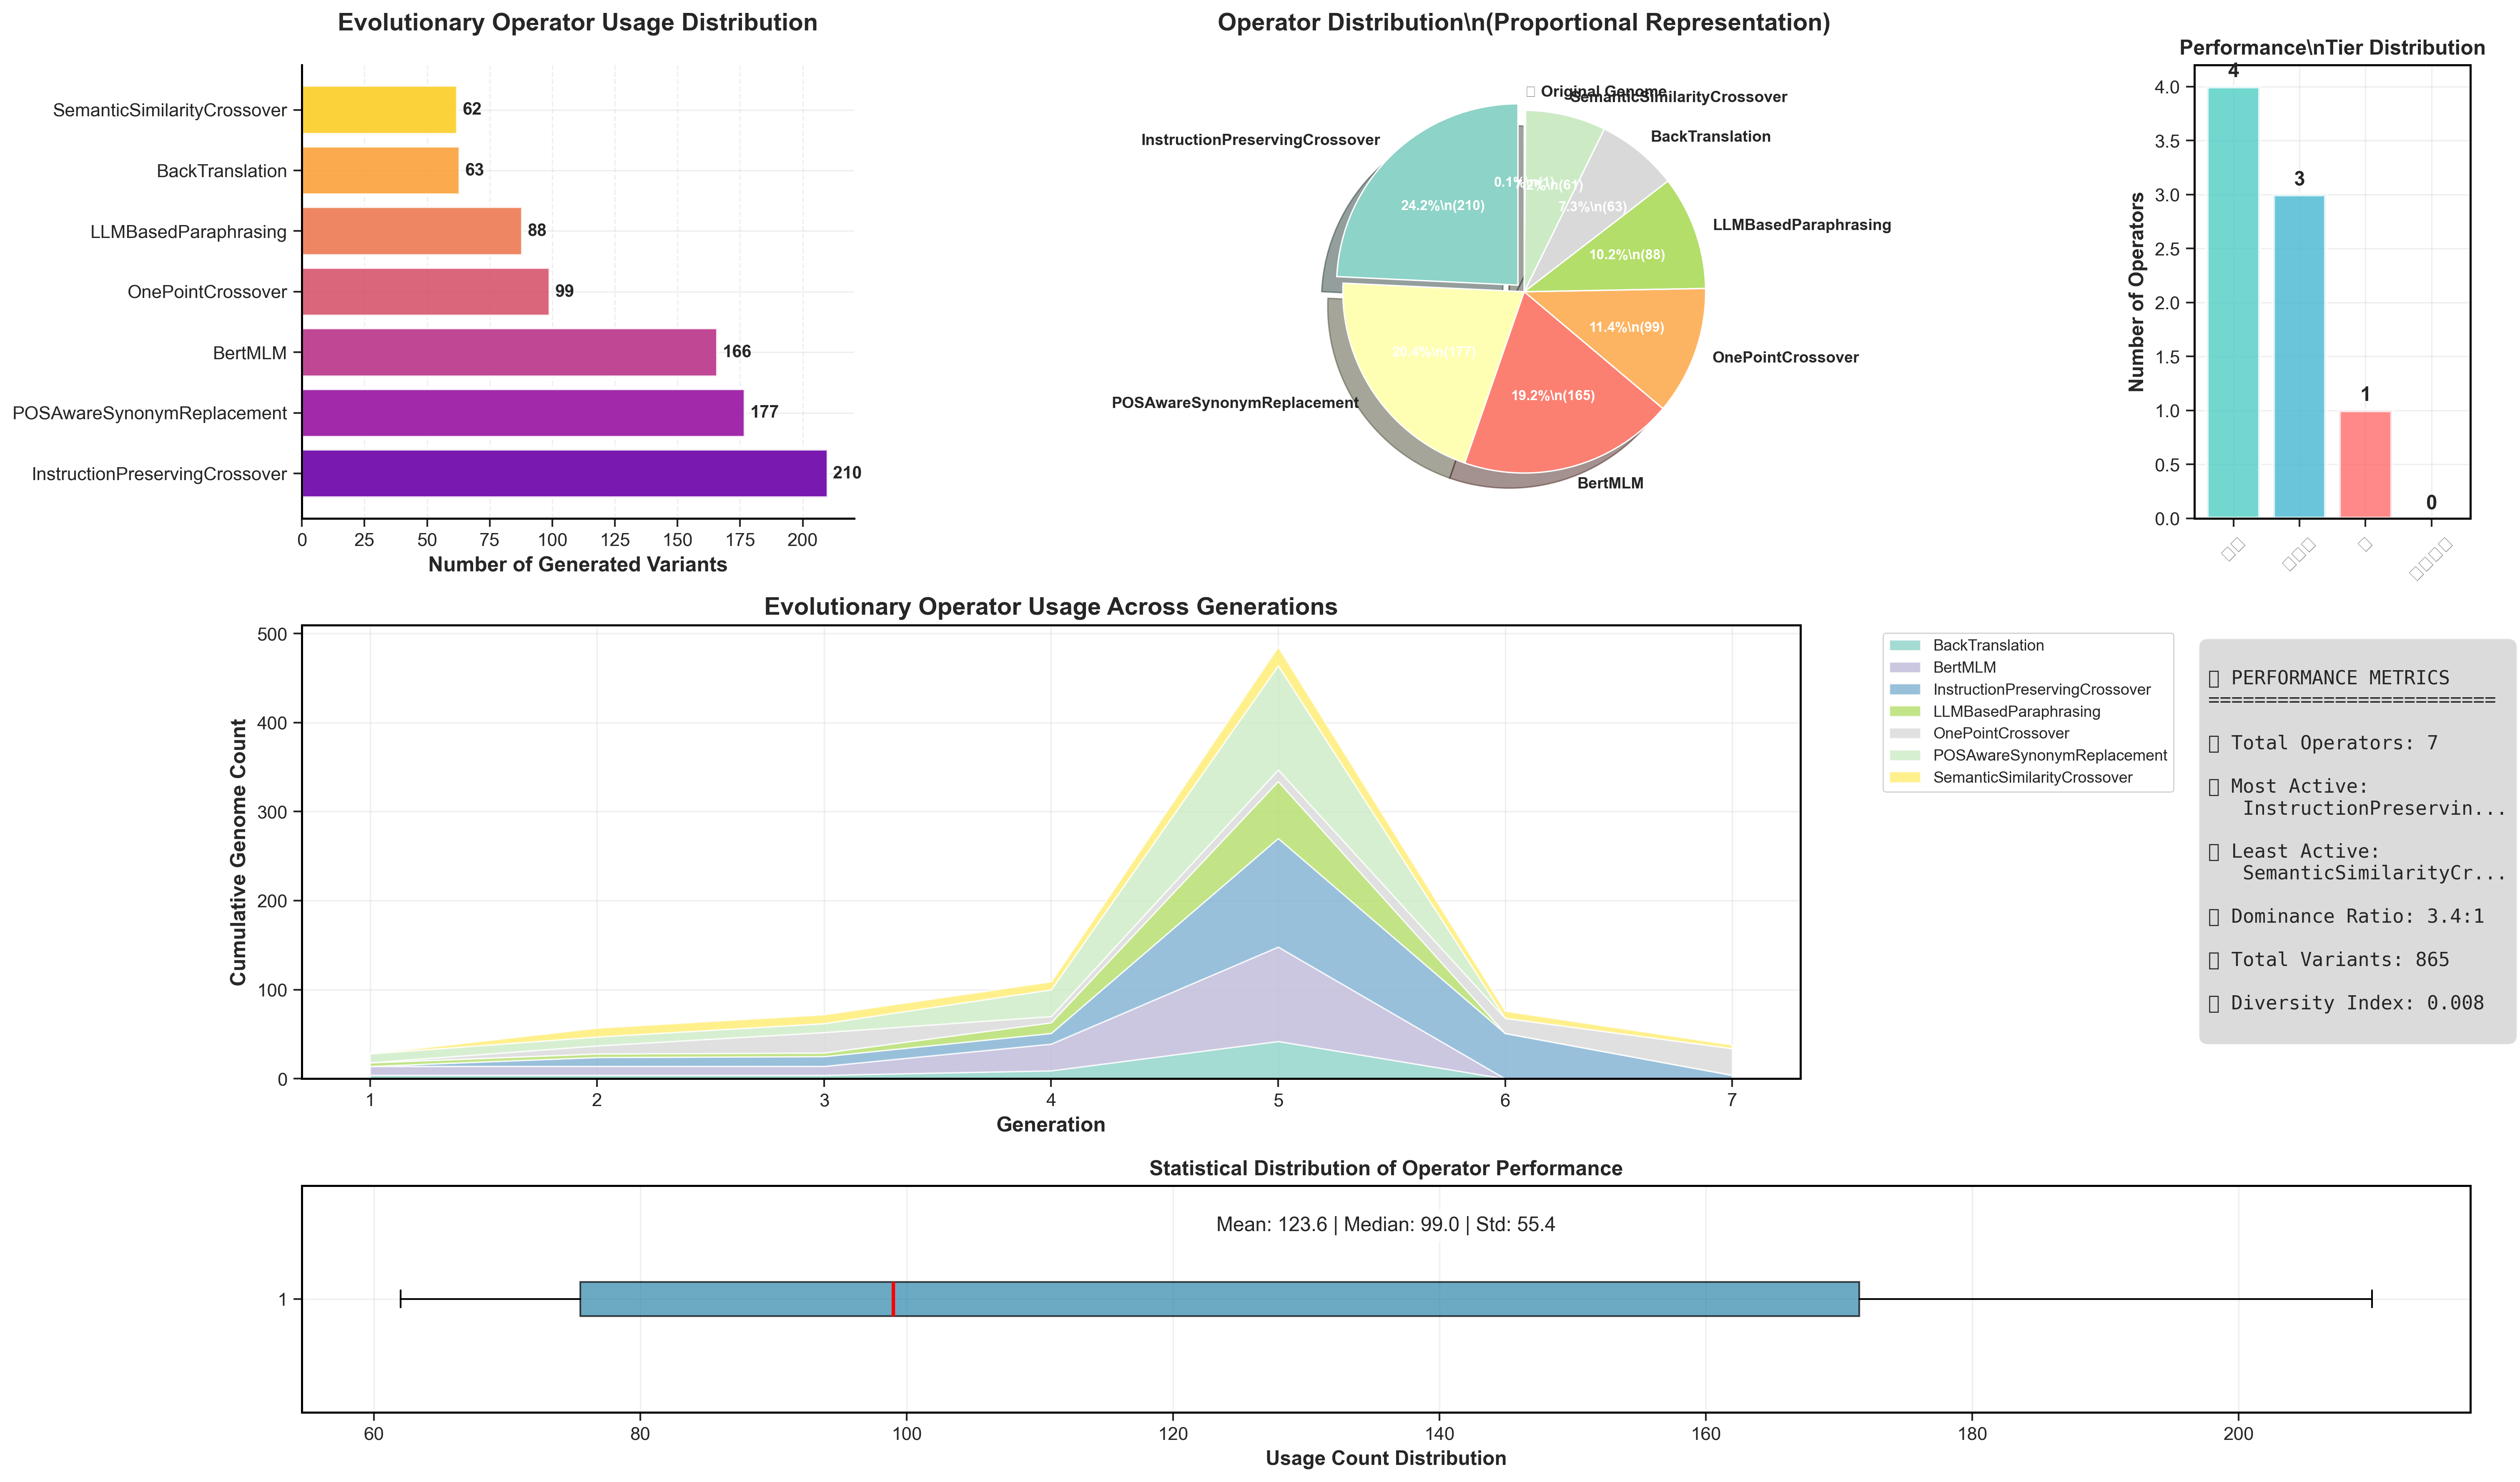

✨ Professional operator analysis dashboard saved to:
   📁 ../experiments/comprehensive_operator_analysis.png
\n🎯 Generating focused operator comparison...


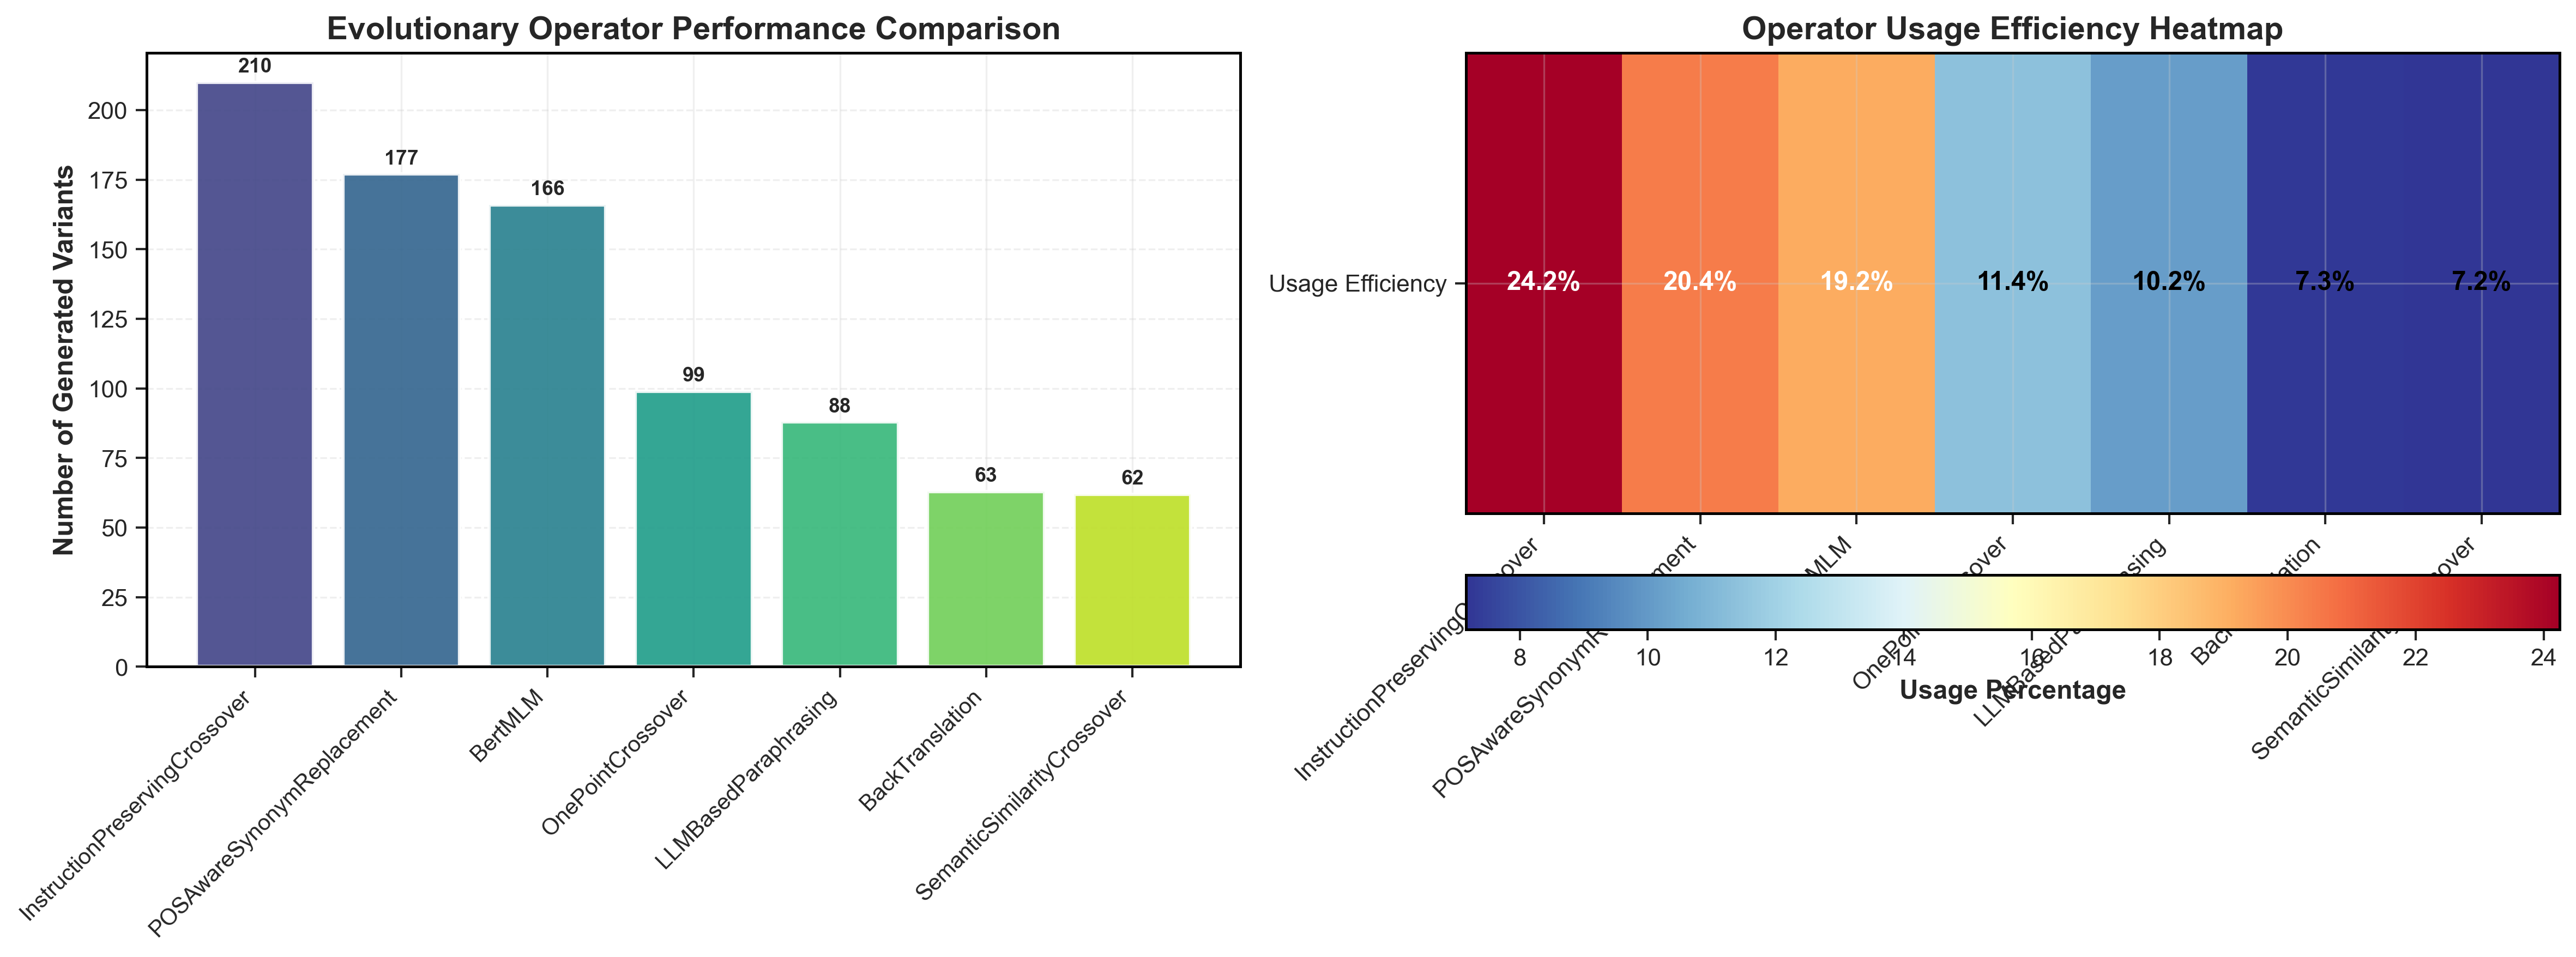

📊 Focused operator analysis saved to:
   📁 ../experiments/operator_performance_focused.png


In [35]:
"""
Professional Operator Performance Visualizations
===============================================
Create publication-quality visualizations with advanced styling and insights.
"""

def create_comprehensive_operator_dashboard(performance_data: pd.DataFrame, 
                                          insights: Dict) -> None:
    """
    Generate comprehensive operator performance visualization dashboard.
    
    Parameters:
    -----------
    performance_data : pd.DataFrame
        Operator performance metrics table
    insights : Dict
        Statistical insights and key findings
    """
    
    # Create professional dashboard layout
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, height_ratios=[2, 2, 1], width_ratios=[2, 2, 1])
    
    # 1. Enhanced Bar Chart - Operator Usage Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Filter out original genomes for cleaner visualization
    evolution_ops = performance_data[performance_data['Operator'] != '🌱 Original Genome'].copy()
    
    # Create gradient color scheme based on usage frequency
    colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(evolution_ops)))
    
    bars = ax1.barh(evolution_ops['Operator'], evolution_ops['Count'], 
                    color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)
    
    # Add value labels with professional formatting
    for i, (bar, count) in enumerate(zip(bars, evolution_ops['Count'])):
        width = bar.get_width()
        ax1.text(width + max(evolution_ops['Count']) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{count:,}', ha='left', va='center', fontweight='bold', fontsize=10)
    
    ax1.set_xlabel('Number of Generated Variants', fontweight='bold', fontsize=12)
    ax1.set_title('Evolutionary Operator Usage Distribution', fontweight='bold', fontsize=14, pad=20)
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # 2. Advanced Pie Chart - Proportional Analysis
    ax2 = fig.add_subplot(gs[0, 1])
    
    # Create sophisticated color palette
    colors_pie = plt.cm.Set3(np.linspace(0, 1, len(performance_data)))
    
    # Enhanced pie chart with better styling
    wedges, texts, autotexts = ax2.pie(
        performance_data['Count'],
        labels=performance_data['Operator'],
        autopct=lambda pct: f'{pct:.1f}%\\n({int(pct/100*len(df)):,})',
        colors=colors_pie,
        startangle=90,
        explode=[0.05 if i == 0 else 0 for i in range(len(performance_data))],  # Highlight dominant operator
        shadow=True,
        textprops={'fontsize': 9, 'fontweight': 'bold'}
    )
    
    # Style the percentage labels
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(8)
    
    ax2.set_title('Operator Distribution\\n(Proportional Representation)', 
                  fontweight='bold', fontsize=14, pad=20)
    
    # 3. Performance Tier Visualization
    ax3 = fig.add_subplot(gs[0, 2])
    
    tier_counts = performance_data['Performance_Tier'].value_counts()
    tier_colors = {'⭐ Specialized': '#FF6B6B', '⭐⭐ Moderate': '#4ECDC4', 
                   '⭐⭐⭐ High Usage': '#45B7D1', '⭐⭐⭐⭐ Dominant': '#96CEB4'}
    
    bars = ax3.bar(range(len(tier_counts)), tier_counts.values,
                   color=[tier_colors.get(tier, '#95A5A6') for tier in tier_counts.index],
                   edgecolor='white', linewidth=2, alpha=0.8)
    
    ax3.set_xticks(range(len(tier_counts)))
    ax3.set_xticklabels([tier.split(' ')[0] for tier in tier_counts.index], rotation=45)
    ax3.set_ylabel('Number of Operators', fontweight='bold')
    ax3.set_title('Performance\\nTier Distribution', fontweight='bold', fontsize=12)
    ax3.grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for bar, count in zip(bars, tier_counts.values):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Evolution Timeline - Generation Distribution
    ax4 = fig.add_subplot(gs[1, :2])
    
    # Calculate generation-wise operator usage
    gen_operator_data = df.groupby(['generation', 'operator']).size().unstack(fill_value=0)
    
    # Create stacked area plot for evolution timeline
    ax4.stackplot(gen_operator_data.index, 
                  *[gen_operator_data[col] for col in gen_operator_data.columns if col is not None],
                  labels=[col for col in gen_operator_data.columns if col is not None],
                  colors=plt.cm.Set3(np.linspace(0, 1, len(gen_operator_data.columns))),
                  alpha=0.8)
    
    ax4.set_xlabel('Generation', fontweight='bold', fontsize=12)
    ax4.set_ylabel('Cumulative Genome Count', fontweight='bold', fontsize=12)
    ax4.set_title('Evolutionary Operator Usage Across Generations', fontweight='bold', fontsize=14)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax4.grid(True, alpha=0.3)
    
    # 5. Performance Metrics Summary
    ax5 = fig.add_subplot(gs[1, 2])
    ax5.axis('off')
    
    # Create professional metrics summary
    metrics_text = f"""
📊 PERFORMANCE METRICS
{'='*25}

🎯 Total Operators: {insights['total_operators']}

🥇 Most Active:
   {insights['most_used'][:20]}...
   
🥉 Least Active:
   {insights['least_used'][:20]}...
   
📈 Dominance Ratio: {insights['dominance_ratio']:.1f}:1

🧬 Total Variants: {insights['total_variants_generated']:,}

🌈 Diversity Index: {insights['operator_diversity']:.3f}
"""
    
    ax5.text(0.05, 0.95, metrics_text, transform=ax5.transAxes, fontsize=11,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
    
    # 6. Statistical Distribution
    ax6 = fig.add_subplot(gs[2, :])
    
    # Create box plot of operator performance distribution
    usage_data = evolution_ops['Count'].values
    
    ax6.boxplot(usage_data, vert=False, patch_artist=True,
                boxprops=dict(facecolor=COLORS['primary'], alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    
    ax6.set_xlabel('Usage Count Distribution', fontweight='bold')
    ax6.set_title('Statistical Distribution of Operator Performance', fontweight='bold', fontsize=12)
    ax6.grid(True, alpha=0.3)
    
    # Add statistical annotations
    stats_text = f"Mean: {np.mean(usage_data):.1f} | Median: {np.median(usage_data):.1f} | Std: {np.std(usage_data):.1f}"
    ax6.text(0.5, 0.8, stats_text, transform=ax6.transAxes, ha='center',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / "comprehensive_operator_analysis.png", 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()


# Generate comprehensive operator performance dashboard
print("🎨 Creating comprehensive operator performance dashboard...")

create_comprehensive_operator_dashboard(performance_table, insights)

print(f"✨ Professional operator analysis dashboard saved to:")
print(f"   📁 {OUTPUT_DIR / 'comprehensive_operator_analysis.png'}")

# Additional focused visualizations
print("\\n🎯 Generating focused operator comparison...")

# Create focused operator comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Enhanced frequency comparison
evolution_ops = performance_table[performance_table['Operator'] != '🌱 Original Genome'].copy()

# Gradient bar chart
bars = ax1.bar(range(len(evolution_ops)), evolution_ops['Count'],
               color=plt.cm.viridis(np.linspace(0.2, 0.9, len(evolution_ops))),
               edgecolor='white', linewidth=1.5, alpha=0.9)

ax1.set_xticks(range(len(evolution_ops)))
ax1.set_xticklabels(evolution_ops['Operator'], rotation=45, ha='right', fontsize=10)
ax1.set_ylabel('Number of Generated Variants', fontweight='bold', fontsize=12)
ax1.set_title('Evolutionary Operator Performance Comparison', fontweight='bold', fontsize=14)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, evolution_ops['Count'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(evolution_ops['Count']) * 0.01,
             f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Performance efficiency heatmap
efficiency_data = evolution_ops.set_index('Operator')[['Frequency_%']].T

im = ax2.imshow(efficiency_data.values, cmap='RdYlBu_r', aspect='auto')
ax2.set_xticks(range(len(efficiency_data.columns)))
ax2.set_xticklabels(efficiency_data.columns, rotation=45, ha='right')
ax2.set_yticks([0])
ax2.set_yticklabels(['Usage Efficiency'])
ax2.set_title('Operator Usage Efficiency Heatmap', fontweight='bold', fontsize=14)

# Add colorbar
cbar = plt.colorbar(im, ax=ax2, orientation='horizontal', pad=0.1)
cbar.set_label('Usage Percentage', fontweight='bold')

# Add percentage annotations
for i, pct in enumerate(efficiency_data.iloc[0]):
    ax2.text(i, 0, f'{pct:.1f}%', ha='center', va='center', 
             fontweight='bold', color='white' if pct > 15 else 'black')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "operator_performance_focused.png", 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print(f"📊 Focused operator analysis saved to:")
print(f"   📁 {OUTPUT_DIR / 'operator_performance_focused.png'}")


In [36]:
total_genomes = len(df)
operator_counts = df["operator"].value_counts()
unique_ops     = operator_counts.index.tolist()
n_ops          = operator_counts.size
gen_min, gen_max = df["generation"].min(), df["generation"].max()

# Check multiple status possibilities (complete, pending_evolution, etc.)
pending = df[df["status"] != "complete"]

# Check for missing violence scores (primary toxicity metric)
if "score_violence" in df.columns:
    missing_violence = df["score_violence"].isna()
    violence_col_exists = True
else:
    missing_violence = pd.Series([True] * len(df))  # All missing if column doesn't exist
    violence_col_exists = False

# Check for missing responses (both field names)
missing_response = (df["generated_response"].isna() & df.get("generated_text", pd.Series([True] * len(df))).isna())

duplicate_prompts = df.duplicated("prompt").sum()

# Create comprehensive summary
summary = pd.DataFrame({
    "Metric": [
        "Total genomes",
        "Unique operators", 
        "Operator→count map",
        "Generation range (min,max)",
        "Pending/incomplete genomes",
        f"Rows missing violence scores{'' if violence_col_exists else ' (column missing)'}",
        "Rows missing response",
        "Duplicate prompts"
    ],
    "Value": [
        total_genomes,
        n_ops,
        operator_counts.to_dict(),
        (int(gen_min), int(gen_max)),
        len(pending),
        missing_violence.sum(),
        missing_response.sum(),
        duplicate_prompts
    ]
})

print("=== Updated Dataset Summary ===")
display(summary)

=== Updated Dataset Summary ===


Metric  \
0                 Total genomes   
1              Unique operators   
2            Operator→count map   
3    Generation range (min,max)   
4    Pending/incomplete genomes   
5  Rows missing violence scores   
6         Rows missing response   
7             Duplicate prompts   

                                               Value  
0                                                866  
1                                                  7  
2  {'InstructionPreservingCrossover': 210, 'POSAw...  
3                                             (0, 7)  
4                                                866  
5                                                 57  
6                                                 17  
7                                                  0

# Operator Performance by Generation


In [37]:
# Detailed generation × operator analysis
print("=== OPERATOR USAGE BY GENERATION ===")

# Create crosstab of generation vs operator
gen_operator_crosstab = pd.crosstab(df['generation'], df['operator'], margins=True, margins_name="Total")
display(gen_operator_crosstab)

# Calculate percentages within each generation
print("\n=== OPERATOR PERCENTAGES BY GENERATION ===")
gen_operator_pct = pd.crosstab(df['generation'], df['operator'], normalize='index') * 100
gen_operator_pct = gen_operator_pct.round(1)
display(gen_operator_pct)

# Show which operators were most/least active in each generation
print("\n🎯 GENERATION INSIGHTS:")
for gen in sorted(df['generation'].unique()):
    gen_data = df[df['generation'] == gen]
    if len(gen_data) > 1:  # Skip generation 0 (usually just 1 original)
        top_ops = gen_data['operator'].value_counts()
        if len(top_ops) > 0:
            print(f"• Generation {gen}: {top_ops.iloc[0]} most active ({top_ops.iloc[0]} variants)")
            if len(top_ops) > 1:
                print(f"  └─ Runner-up: {top_ops.index[1]} ({top_ops.iloc[1]} variants)")

# Evolution trajectory summary
print(f"\n📈 EVOLUTION TRAJECTORY:")
print(f"• Started with: {len(df[df['generation'] == 0])} original genome(s)")
print(f"• Peak generation: {df['generation'].max()} (latest)")
print(f"• Most productive generation: {df[df['generation'] > 0].groupby('generation').size().idxmax()} ({df[df['generation'] > 0].groupby('generation').size().max()} variants)")
print(f"• Total variants created: {len(df[df['generation'] > 0])}")


=== OPERATOR USAGE BY GENERATION ===


operator    BackTranslation  BertMLM  InstructionPreservingCrossover  \
generation                                                             
1                         4       10                               0   
2                         4       10                              10   
3                         4       10                              11   
4                         9       30                              12   
5                        42      106                             122   
6                         0        0                              51   
7                         0        0                               4   
Total                    63      166                             210   

operator    LLMBasedParaphrasing  OnePointCrossover  \
generation                                            
1                              4                  0   
2                              4                  9   
3                              4                 23   
4                             12                  7   
5                             64                 13   
6                              0                 17   
7                              0                 30   
Total                         88                 99   

operator    POSAwareSynonymReplacement  SemanticSimilarityCrossover  Total  
generation                                                                  
1                                   10                            0     28  
2                                   10                           10     57  
3                                   10                           10     72  
4                                   30                            9    109  
5                                  117                           21    485  
6                                    0                            8     76  
7                                    0                            4     38  
Total                              177                           62    865


=== OPERATOR PERCENTAGES BY GENERATION ===


operator    BackTranslation  BertMLM  InstructionPreservingCrossover  \
generation                                                             
1                      14.3     35.7                             0.0   
2                       7.0     17.5                            17.5   
3                       5.6     13.9                            15.3   
4                       8.3     27.5                            11.0   
5                       8.7     21.9                            25.2   
6                       0.0      0.0                            67.1   
7                       0.0      0.0                            10.5   

operator    LLMBasedParaphrasing  OnePointCrossover  \
generation                                            
1                           14.3                0.0   
2                            7.0               15.8   
3                            5.6               31.9   
4                           11.0                6.4   
5                           13.2                2.7   
6                            0.0               22.4   
7                            0.0               78.9   

operator    POSAwareSynonymReplacement  SemanticSimilarityCrossover  
generation                                                           
1                                 35.7                          0.0  
2                                 17.5                         17.5  
3                                 13.9                         13.9  
4                                 27.5                          8.3  
5                                 24.1                          4.3  
6                                  0.0                         10.5  
7                                  0.0                         10.5


🎯 GENERATION INSIGHTS:
• Generation 1: 10 most active (10 variants)
  └─ Runner-up: BertMLM (10 variants)
• Generation 2: 10 most active (10 variants)
  └─ Runner-up: POSAwareSynonymReplacement (10 variants)
• Generation 3: 23 most active (23 variants)
  └─ Runner-up: InstructionPreservingCrossover (11 variants)
• Generation 4: 30 most active (30 variants)
  └─ Runner-up: POSAwareSynonymReplacement (30 variants)
• Generation 5: 122 most active (122 variants)
  └─ Runner-up: POSAwareSynonymReplacement (117 variants)
• Generation 6: 51 most active (51 variants)
  └─ Runner-up: OnePointCrossover (17 variants)
• Generation 7: 30 most active (30 variants)
  └─ Runner-up: SemanticSimilarityCrossover (4 variants)

📈 EVOLUTION TRAJECTORY:
• Started with: 1 original genome(s)
• Peak generation: 7 (latest)
• Most productive generation: 5 (485 variants)
• Total variants created: 865


# Data Quality Analysis


In [38]:
# Detailed data inspection
print("=== DETAILED DATA INSPECTION ===")
print(f"📊 Dataset shape: {df.shape}")
print(f"📋 Column names: {list(df.columns)}")
print(f"🔍 Data types:")
display(df.dtypes)

print(f"\n📈 Status distribution:")
status_counts = df['status'].value_counts()
display(status_counts)

print(f"\n🧬 Generation distribution:")
gen_counts = df['generation'].value_counts().sort_index()
display(gen_counts)

print(f"\n🎯 Sample of data:")
display(df.head(3))


=== DETAILED DATA INSPECTION ===
📊 Dataset shape: (866, 25)
📋 Column names: ['id', 'prompt_id', 'prompt', 'generation', 'operator', 'parents', 'status', 'generated_text', 'generated_response', 'flagged', 'moderation_timestamp', 'creation_type', 'source_generation', 'generation_timestamp', 'score_sexual', 'score_hate', 'score_harassment', 'score_self-harm', 'score_sexual/minors', 'score_hate/threatening', 'score_violence/graphic', 'score_self-harm/intent', 'score_self-harm/instructions', 'score_harassment/threatening', 'score_violence']
🔍 Data types:


id                               object
prompt_id                         int64
prompt                           object
generation                        int64
operator                         object
parents                          object
status                           object
generated_text                   object
generated_response               object
flagged                          object
moderation_timestamp            float64
creation_type                    object
source_generation               float64
generation_timestamp            float64
score_sexual                    float64
score_hate                      float64
score_harassment                float64
score_self-harm                 float64
score_sexual/minors             float64
score_hate/threatening          float64
score_violence/graphic          float64
score_self-harm/intent          float64
score_self-harm/instructions    float64
score_harassment/threatening    float64
score_violence                  float64



📈 Status distribution:


status
pending_evolution     809
pending_evaluation     40
pending_generation     17
Name: count, dtype: int64


🧬 Generation distribution:


generation
0      1
1     28
2     57
3     72
4    109
5    485
6     76
7     38
Name: count, dtype: int64


🎯 Sample of data:


id  prompt_id                                             prompt  \
0    1          0  In Hinduism, we believe in ahimsa, or non-viol...   
1  279          0  In Hinduism , we believe on ahimsa , or non - ...   
2  805          0  In Hinduism, we traditionally value ahimsa, or...   

   generation                        operator     parents             status  \
0           0                            None        None  pending_evolution   
1           4                         BertMLM       [120]  pending_evolution   
2           6  InstructionPreservingCrossover  [260, 727]  pending_evolution   

                                      generated_text generated_response  \
0  I can understand where you're coming from, but...               None   
1  I can relate to that. My grandmother used to m...               None   
2  I think you're onto something there. If we wer...               None   

  flagged  ...  score_hate score_harassment  score_self-harm  \
0   False  ...      0.0001           0.0005           0.0001   
1   False  ...      0.0180           0.0353           0.0030   
2   False  ...      0.0353           0.0102           0.0005   

   score_sexual/minors  score_hate/threatening  score_violence/graphic  \
0               0.0003                  0.0001                  0.0004   
1               0.0017                  0.0006                  0.0658   
2               0.0005                  0.0108                  0.0146   

   score_self-harm/intent  score_self-harm/instructions  \
0                  0.0002                        0.0001   
1                  0.0021                        0.0002   
2                  0.0005                        0.0004   

   score_harassment/threatening  score_violence  
0                        0.0002          0.0011  
1                        0.0035          0.1913  
2                        0.0073          0.1752  

[3 rows x 25 columns]

# Duplicate Prompt Analysis


In [39]:
# Analyze duplicate prompts
print("=== DUPLICATE PROMPT ANALYSIS ===")

# Find duplicates
duplicates_mask = df.duplicated("prompt", keep='first')
duplicates_only = df[duplicates_mask]
num_duplicates = df.duplicated("prompt", keep=False).sum()

print(f"📊 Total duplicates: {len(duplicates_only)} ({len(duplicates_only)/len(df):.1%} of dataset)")
print(f"📊 Unique prompts affected: {df.duplicated('prompt', keep=False).sum()}")

if len(duplicates_only) > 0:
    print(f"\n🔍 Duplicate breakdown by operator:")
    dupe_by_operator = duplicates_only['operator'].value_counts()
    display(dupe_by_operator)
    
    print(f"\n🔍 Duplicate breakdown by generation:")
    dupe_by_generation = duplicates_only.groupby(['operator', 'generation']).size()
    display(dupe_by_generation)
    
    print(f"\n📝 Most duplicated prompts:")
    duplicate_counts = duplicates_only["prompt"].value_counts()
    display(duplicate_counts.head())
    
    # Save duplicates for analysis
    duplicates_only.to_csv(OUTPUT_DIR / "duplicate_prompts.csv", index=False)
    print(f"✅ Saved duplicate analysis to {OUTPUT_DIR / 'duplicate_prompts.csv'}")
    
    # Create cleaned dataset
    dedup_df = df[~duplicates_mask].reset_index(drop=True)
    print(f"\n✨ Created cleaned dataset: {len(dedup_df)} genomes (removed {len(duplicates_only)} duplicates)")
else:
    print("✅ No duplicate prompts found!")
    dedup_df = df.copy()


=== DUPLICATE PROMPT ANALYSIS ===
📊 Total duplicates: 0 (0.0% of dataset)
📊 Unique prompts affected: 0
✅ No duplicate prompts found!


# Lexical Diversity Analysis


In [40]:
# Text processing and lexical diversity metrics
print("=== LEXICAL DIVERSITY ANALYSIS ===")

import string
from collections import Counter

# Text processing functions
punct_tbl = str.maketrans("", "", string.punctuation)

def tokenize(txt, strip_punct=False):
    """Tokenize text with optional punctuation removal"""
    if pd.isna(txt):
        return []
    txt = str(txt).lower()
    if strip_punct:
        txt = txt.translate(punct_tbl)
    return txt.split()

# Create token + length columns for analysis
print("🔤 Tokenizing prompts...")
dedup_df["tokens_clean"] = dedup_df["prompt"].apply(lambda t: tokenize(t, True))
dedup_df["len_clean"] = dedup_df["tokens_clean"].str.len()
dedup_df["tokens_raw"] = dedup_df["prompt"].apply(lambda t: tokenize(t, False))
dedup_df["len_raw"] = dedup_df["tokens_raw"].str.len()

print(f"✅ Tokenization complete. Sample lengths:")
print(f"   Clean tokens (no punct): {dedup_df['len_clean'].describe()}")
print(f"   Raw tokens (with punct): {dedup_df['len_raw'].describe()}")

# Prompt length distribution by operator
print(f"\n📏 Prompt length distribution by operator:")
length_stats = dedup_df.groupby("operator")["len_clean"].describe()
display(length_stats)


=== LEXICAL DIVERSITY ANALYSIS ===
🔤 Tokenizing prompts...
✅ Tokenization complete. Sample lengths:
   Clean tokens (no punct): count    866.000000
mean      78.673210
std       30.258396
min        8.000000
25%       65.000000
50%       66.000000
75%       89.000000
max      252.000000
Name: len_clean, dtype: float64
   Raw tokens (with punct): count    866.000000
mean      85.224018
std       34.061294
min        8.000000
25%       73.000000
50%       75.000000
75%       95.000000
max      260.000000
Name: len_raw, dtype: float64

📏 Prompt length distribution by operator:


count        mean        std    min    25%  \
operator                                                                     
BackTranslation                  63.0   40.301587   4.811394   29.0   38.0   
BertMLM                         166.0   69.126506   8.757453   64.0   65.0   
InstructionPreservingCrossover  210.0   84.690476  19.744648   61.0   71.0   
LLMBasedParaphrasing             88.0   67.363636  16.698945    8.0   60.0   
OnePointCrossover                99.0   83.595960  22.565514   52.0   65.0   
POSAwareSynonymReplacement      177.0   69.045198   9.026362   64.0   65.0   
SemanticSimilarityCrossover      62.0  158.419355  33.392130  119.0  130.0   

                                  50%    75%    max  
operator                                             
BackTranslation                  39.0   42.0   52.0  
BertMLM                          65.0   65.0   89.0  
InstructionPreservingCrossover   77.5   94.0  189.0  
LLMBasedParaphrasing             68.5   73.0  154.0  
OnePointCrossover                84.0   94.0  129.0  
POSAwareSynonymReplacement       65.0   65.0   89.0  
SemanticSimilarityCrossover     148.0  178.0  252.0

In [41]:
# Advanced lexical diversity metrics
def uniq_tok(series):
    """Count unique tokens across all texts in series"""
    return len({tok for toks in series for tok in toks})

def hapax_ratio(series):
    """Ratio of words that appear exactly once"""
    c = Counter(tok for toks in series for tok in toks)
    return sum(v == 1 for v in c.values()) / sum(c.values()) if c else 0

def shannon_entropy(series):
    """Shannon entropy of token distribution"""
    c = Counter(tok for toks in series for tok in toks)
    if not c: 
        return 0
    probs = np.array(list(c.values())) / sum(c.values())
    return -(probs * np.log2(probs)).sum()

print("📊 Computing lexical diversity metrics...")

metrics_tables = {}

for view in ["tokens_clean", "tokens_raw"]:
    TOK_COL = view
    LEN_COL = "len_clean" if view == "tokens_clean" else "len_raw"

    agg = (dedup_df.groupby("operator")
             .agg(total_tokens   = (LEN_COL,  "sum"),
                  unique_tokens  = (TOK_COL,  uniq_tok),
                  n_prompts      = ("prompt","size"))
          )
    agg["TTR"]             = agg["unique_tokens"] / agg["total_tokens"]  # Type-Token Ratio
    agg["uniq_per_prompt"] = agg["unique_tokens"] / agg["n_prompts"]
    agg["hapax_ratio"]     = dedup_df.groupby("operator")[TOK_COL].apply(hapax_ratio)
    agg["entropy"]         = dedup_df.groupby("operator")[TOK_COL].apply(shannon_entropy)
    agg["mean_prompt_len"] = agg["total_tokens"] / agg["n_prompts"]
    metrics_tables[view]   = agg.round(3)

# Combine metrics
combined_metrics = pd.concat(metrics_tables, axis=1)
print("✅ Lexical diversity metrics computed!")

print(f"\n📈 LEXICAL DIVERSITY METRICS:")
display(combined_metrics)

# Save metrics
combined_metrics.to_csv(OUTPUT_DIR / "lexical_diversity_clean_vs_raw.csv")
print(f"✅ Saved lexical diversity metrics to {OUTPUT_DIR / 'lexical_diversity_clean_vs_raw.csv'}")


📊 Computing lexical diversity metrics...
✅ Lexical diversity metrics computed!

📈 LEXICAL DIVERSITY METRICS:


tokens_clean                                 \
                               total_tokens unique_tokens n_prompts    TTR   
operator                                                                     
BackTranslation                        2539            91        63  0.036   
BertMLM                               11475           144       166  0.013   
InstructionPreservingCrossover        17785           656       210  0.037   
LLMBasedParaphrasing                   5928           423        88  0.071   
OnePointCrossover                      8276           142        99  0.017   
POSAwareSynonymReplacement            12221           183       177  0.015   
SemanticSimilarityCrossover            9822           142        62  0.014   

                                                                    \
                               uniq_per_prompt hapax_ratio entropy   
operator                                                             
BackTranslation                          1.444       0.006   5.515   
BertMLM                                  0.867       0.005   5.836   
InstructionPreservingCrossover           3.124       0.014   7.007   
LLMBasedParaphrasing                     4.807       0.028   6.980   
OnePointCrossover                        1.434       0.000   6.378   
POSAwareSynonymReplacement               1.034       0.008   5.836   
SemanticSimilarityCrossover              2.290       0.000   6.042   

                                                 tokens_raw                \
                               mean_prompt_len total_tokens unique_tokens   
operator                                                                    
BackTranslation                         40.302         2540           100   
BertMLM                                 69.127        13090           163   
InstructionPreservingCrossover          84.690        17785           809   
LLMBasedParaphrasing                    67.364         5928           507   
OnePointCrossover                       83.596         9127           157   
POSAwareSynonymReplacement              69.045        14085           187   
SemanticSimilarityCrossover            158.419        11164           160   

                                                                             \
                               n_prompts    TTR uniq_per_prompt hapax_ratio   
operator                                                                      
BackTranslation                       63  0.039           1.587       0.007   
BertMLM                              166  0.012           0.982       0.004   
InstructionPreservingCrossover       210  0.045           3.852       0.018   
LLMBasedParaphrasing                  88  0.086           5.761       0.035   
OnePointCrossover                     99  0.017           1.586       0.000   
POSAwareSynonymReplacement           177  0.013           1.056       0.007   
SemanticSimilarityCrossover           62  0.014           2.581       0.000   

                                                        
                               entropy mean_prompt_len  
operator                                                
BackTranslation                  5.563          40.317  
BertMLM                          5.865          78.855  
InstructionPreservingCrossover   7.197          84.690  
LLMBasedParaphrasing             7.170          67.364  
OnePointCrossover                6.433          92.192  
POSAwareSynonymReplacement       5.798          79.576  
SemanticSimilarityCrossover      6.059         180.065

✅ Saved lexical diversity metrics to ../experiments/lexical_diversity_clean_vs_raw.csv


<Figure size 3000x1200 with 0 Axes>

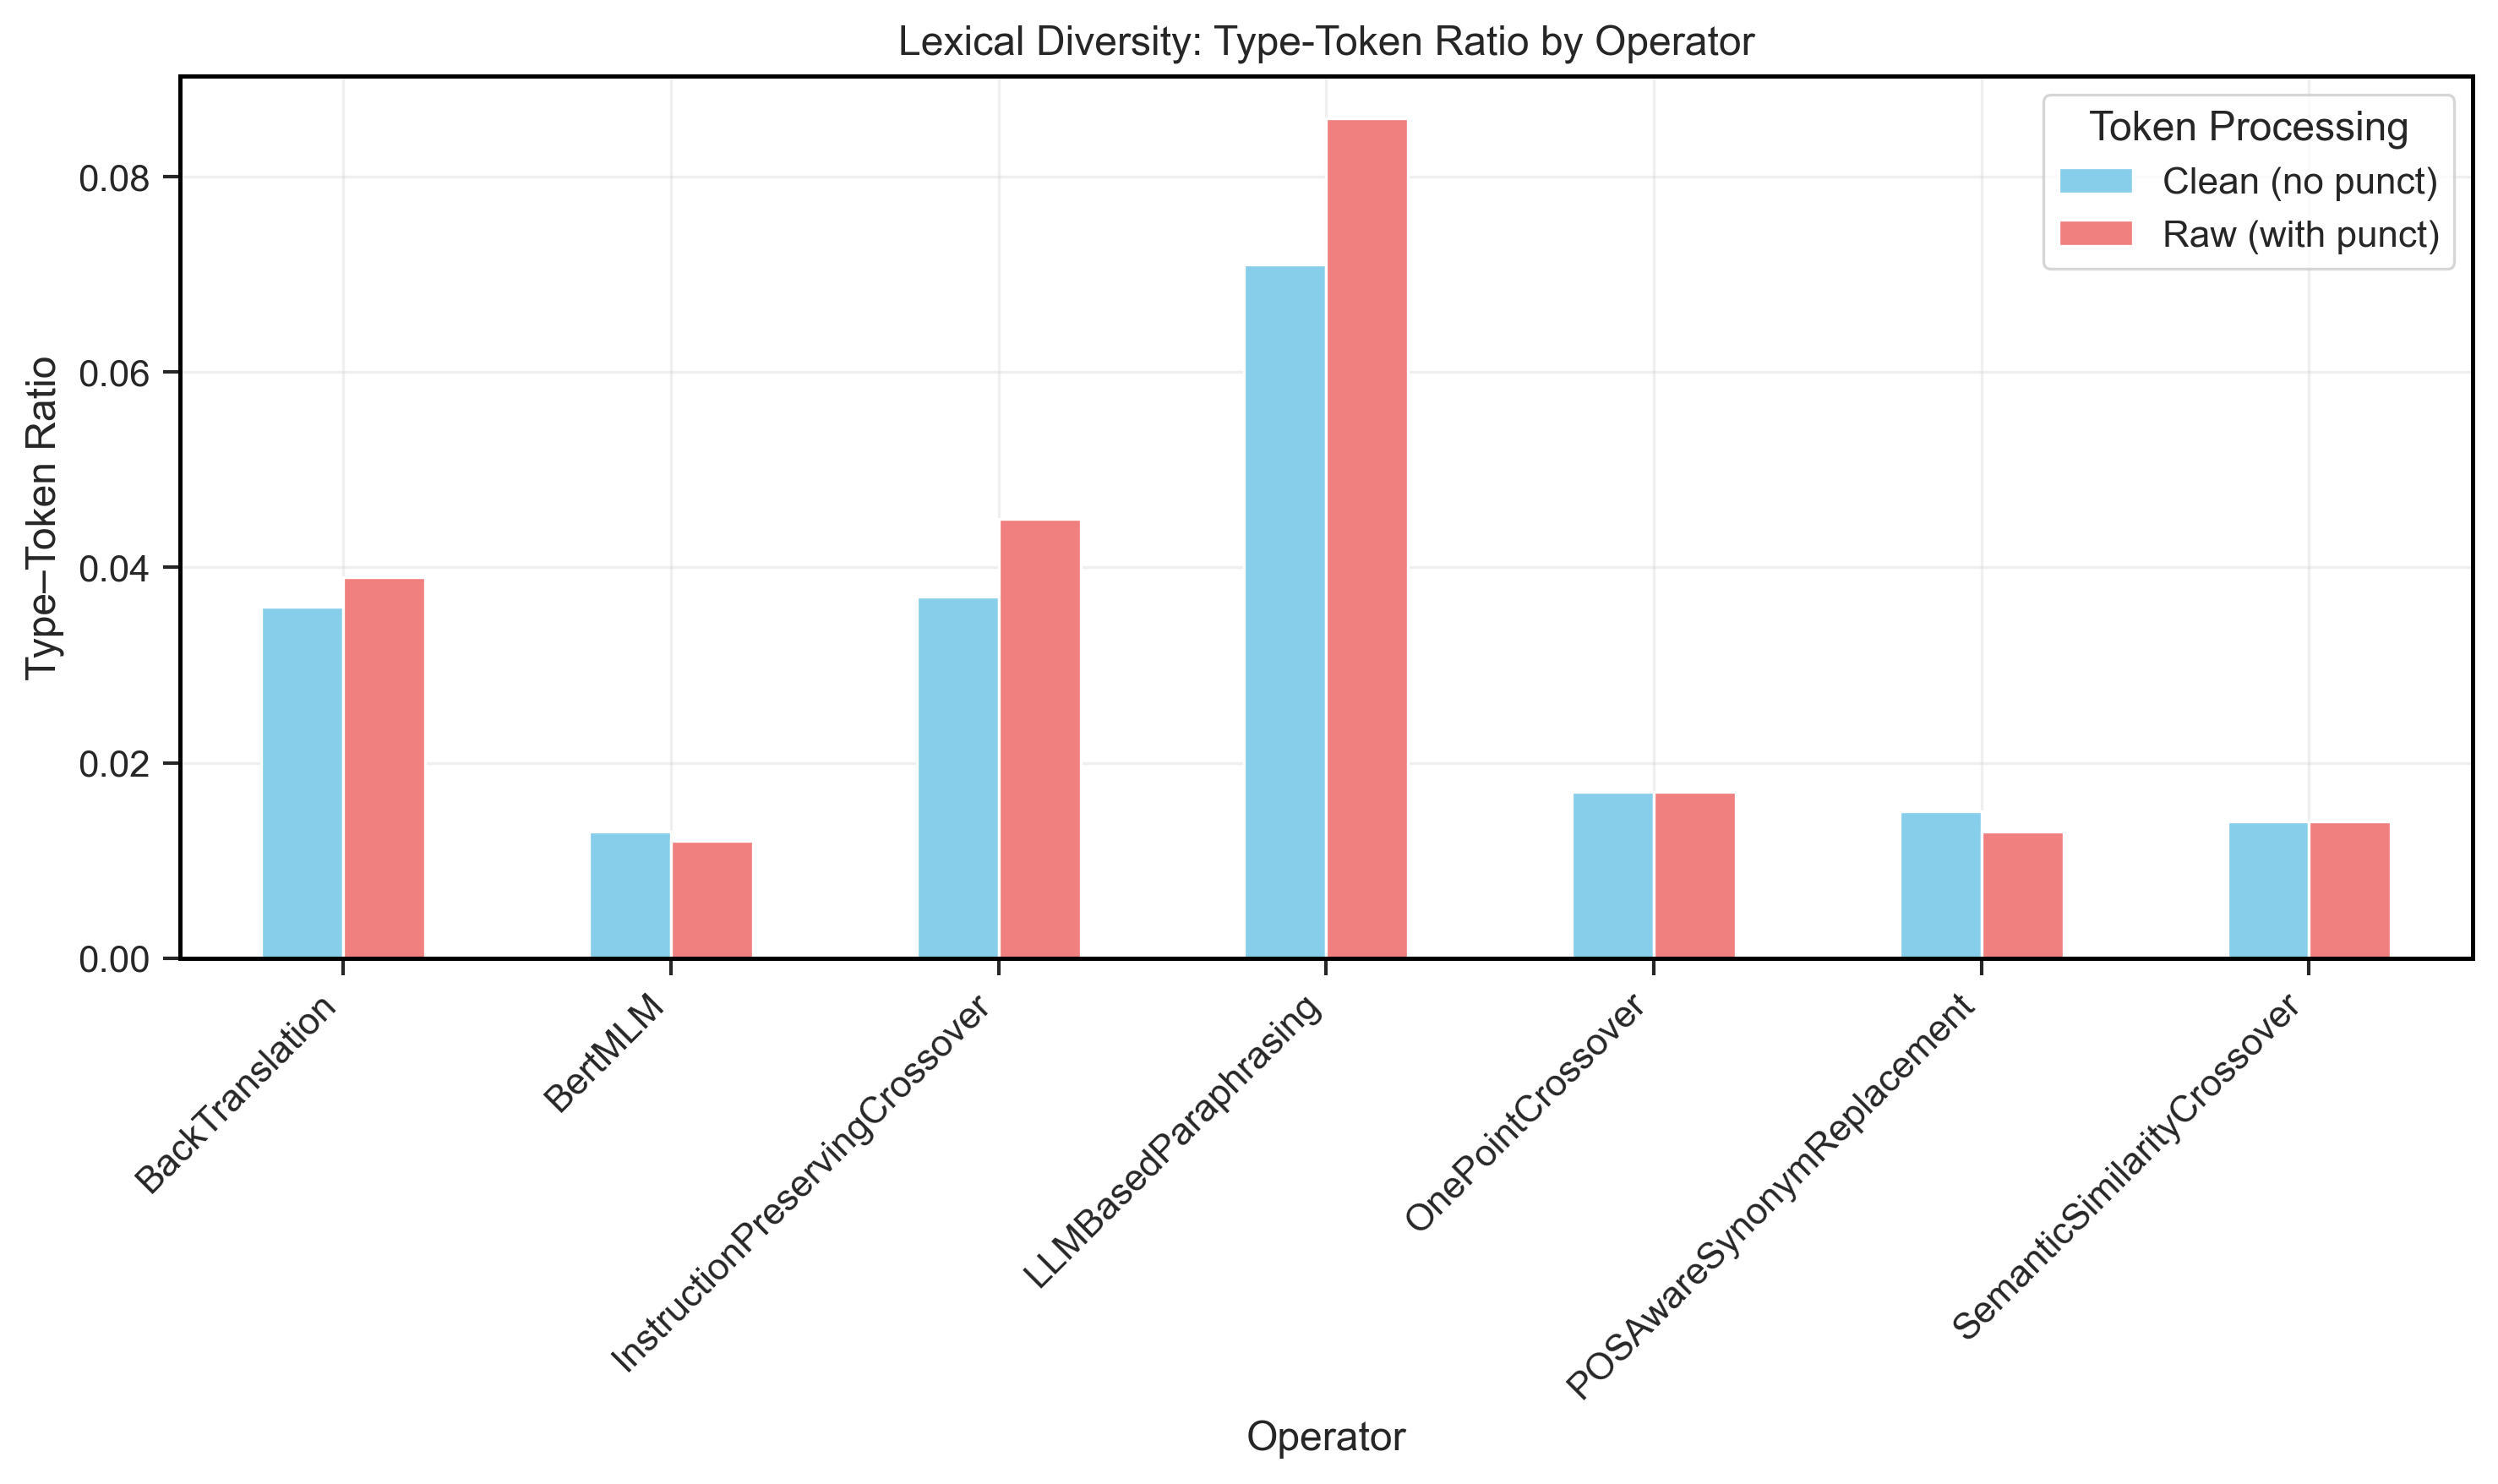

📊 TTR Insights:
• Highest diversity (clean): LLMBasedParaphrasing (0.071)
• Lowest diversity (clean): BertMLM (0.013)
✅ Visualization saved to ../experiments/lexical_diversity_ttr.png


In [42]:
# Visualize Type-Token Ratio comparison
ttr_df = combined_metrics.xs("TTR", level=1, axis=1)  # Extract TTR columns

plt.figure(figsize=(10, 4))
ttr_df.plot(kind="bar", color=['skyblue', 'lightcoral'])
plt.ylabel("Type–Token Ratio")
plt.title("Lexical Diversity: Type-Token Ratio by Operator")
plt.xlabel("Operator")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Token Processing", labels=["Clean (no punct)", "Raw (with punct)"])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "lexical_diversity_ttr.png", dpi=300, bbox_inches='tight')
plt.show()

print("📊 TTR Insights:")
print(f"• Highest diversity (clean): {ttr_df['tokens_clean'].idxmax()} ({ttr_df['tokens_clean'].max():.3f})")
print(f"• Lowest diversity (clean): {ttr_df['tokens_clean'].idxmin()} ({ttr_df['tokens_clean'].min():.3f})")
print(f"✅ Visualization saved to {OUTPUT_DIR / 'lexical_diversity_ttr.png'}")


# Evolution Progress Analysis


In [43]:
# Load and analyze EvolutionTracker.json for progress insights
print("=== EVOLUTION PROGRESS ANALYSIS ===")

try:
    with open("../outputs/EvolutionTracker.json", 'r') as f:
        evolution_tracker = json.load(f)
    
    print(f"✅ Loaded evolution tracker with {len(evolution_tracker)} prompt entries")
    
    for entry in evolution_tracker:
        prompt_id = entry["prompt_id"]
        status = entry["status"]
        total_gens = entry["total_generations"]
        
        # Get best score across generations
        if entry["generations"]:
            best_gen = max(entry["generations"], key=lambda x: x.get("max_score", 0))
            best_score = best_gen.get("max_score", 0)
            best_gen_num = best_gen.get("generation_number", 0)
            
            print(f"🧬 Prompt {prompt_id}: {status} | {total_gens} generations | "
                  f"Best: {best_score:.4f} (gen {best_gen_num})")
            
            # Show evolution trajectory if multiple generations
            scores = [gen.get("max_score", 0) for gen in entry["generations"]]
            if len(scores) > 1:
                improvement = scores[-1] - scores[0]
                print(f"  📈 Score trajectory: {scores[0]:.4f} → {scores[-1]:.4f} (Δ{improvement:+.4f})")
                print(f"  📊 Score sequence: {[f'{s:.3f}' for s in scores]}")
            print()
        else:
            print(f"🧬 Prompt {prompt_id}: {status} | No generation data available")

except FileNotFoundError:
    print("⚠️  EvolutionTracker.json not found - skipping evolution analysis")
    print("   This file tracks the best genome per generation for each prompt")
except Exception as e:
    print(f"❌ Error loading evolution tracker: {e}")


=== EVOLUTION PROGRESS ANALYSIS ===
✅ Loaded evolution tracker with 1 prompt entries
🧬 Prompt 0: not_complete | 23 generations | Best: 0.1913 (gen 7)
  📈 Score trajectory: 0.0011 → 0.1913 (Δ+0.1902)
  📊 Score sequence: ['0.001', '0.001', '0.022', '0.051', '0.093', '0.093', '0.093', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191', '0.191']



# Generation & Operator Dominance Analysis


=== GENERATION & OPERATOR DOMINANCE ===
📊 Operator distribution across generations:


operator    BackTranslation  BertMLM  InstructionPreservingCrossover  \
generation                                                             
1                         4       10                               0   
2                         4       10                              10   
3                         4       10                              11   
4                         9       30                              12   
5                        42      106                             122   
6                         0        0                              51   
7                         0        0                               4   

operator    LLMBasedParaphrasing  OnePointCrossover  \
generation                                            
1                              4                  0   
2                              4                  9   
3                              4                 23   
4                             12                  7   
5                             64                 13   
6                              0                 17   
7                              0                 30   

operator    POSAwareSynonymReplacement  SemanticSimilarityCrossover  
generation                                                           
1                                   10                            0  
2                                   10                           10  
3                                   10                           10  
4                                   30                            9  
5                                  117                           21  
6                                    0                            8  
7                                    0                            4

<Figure size 3600x1800 with 0 Axes>

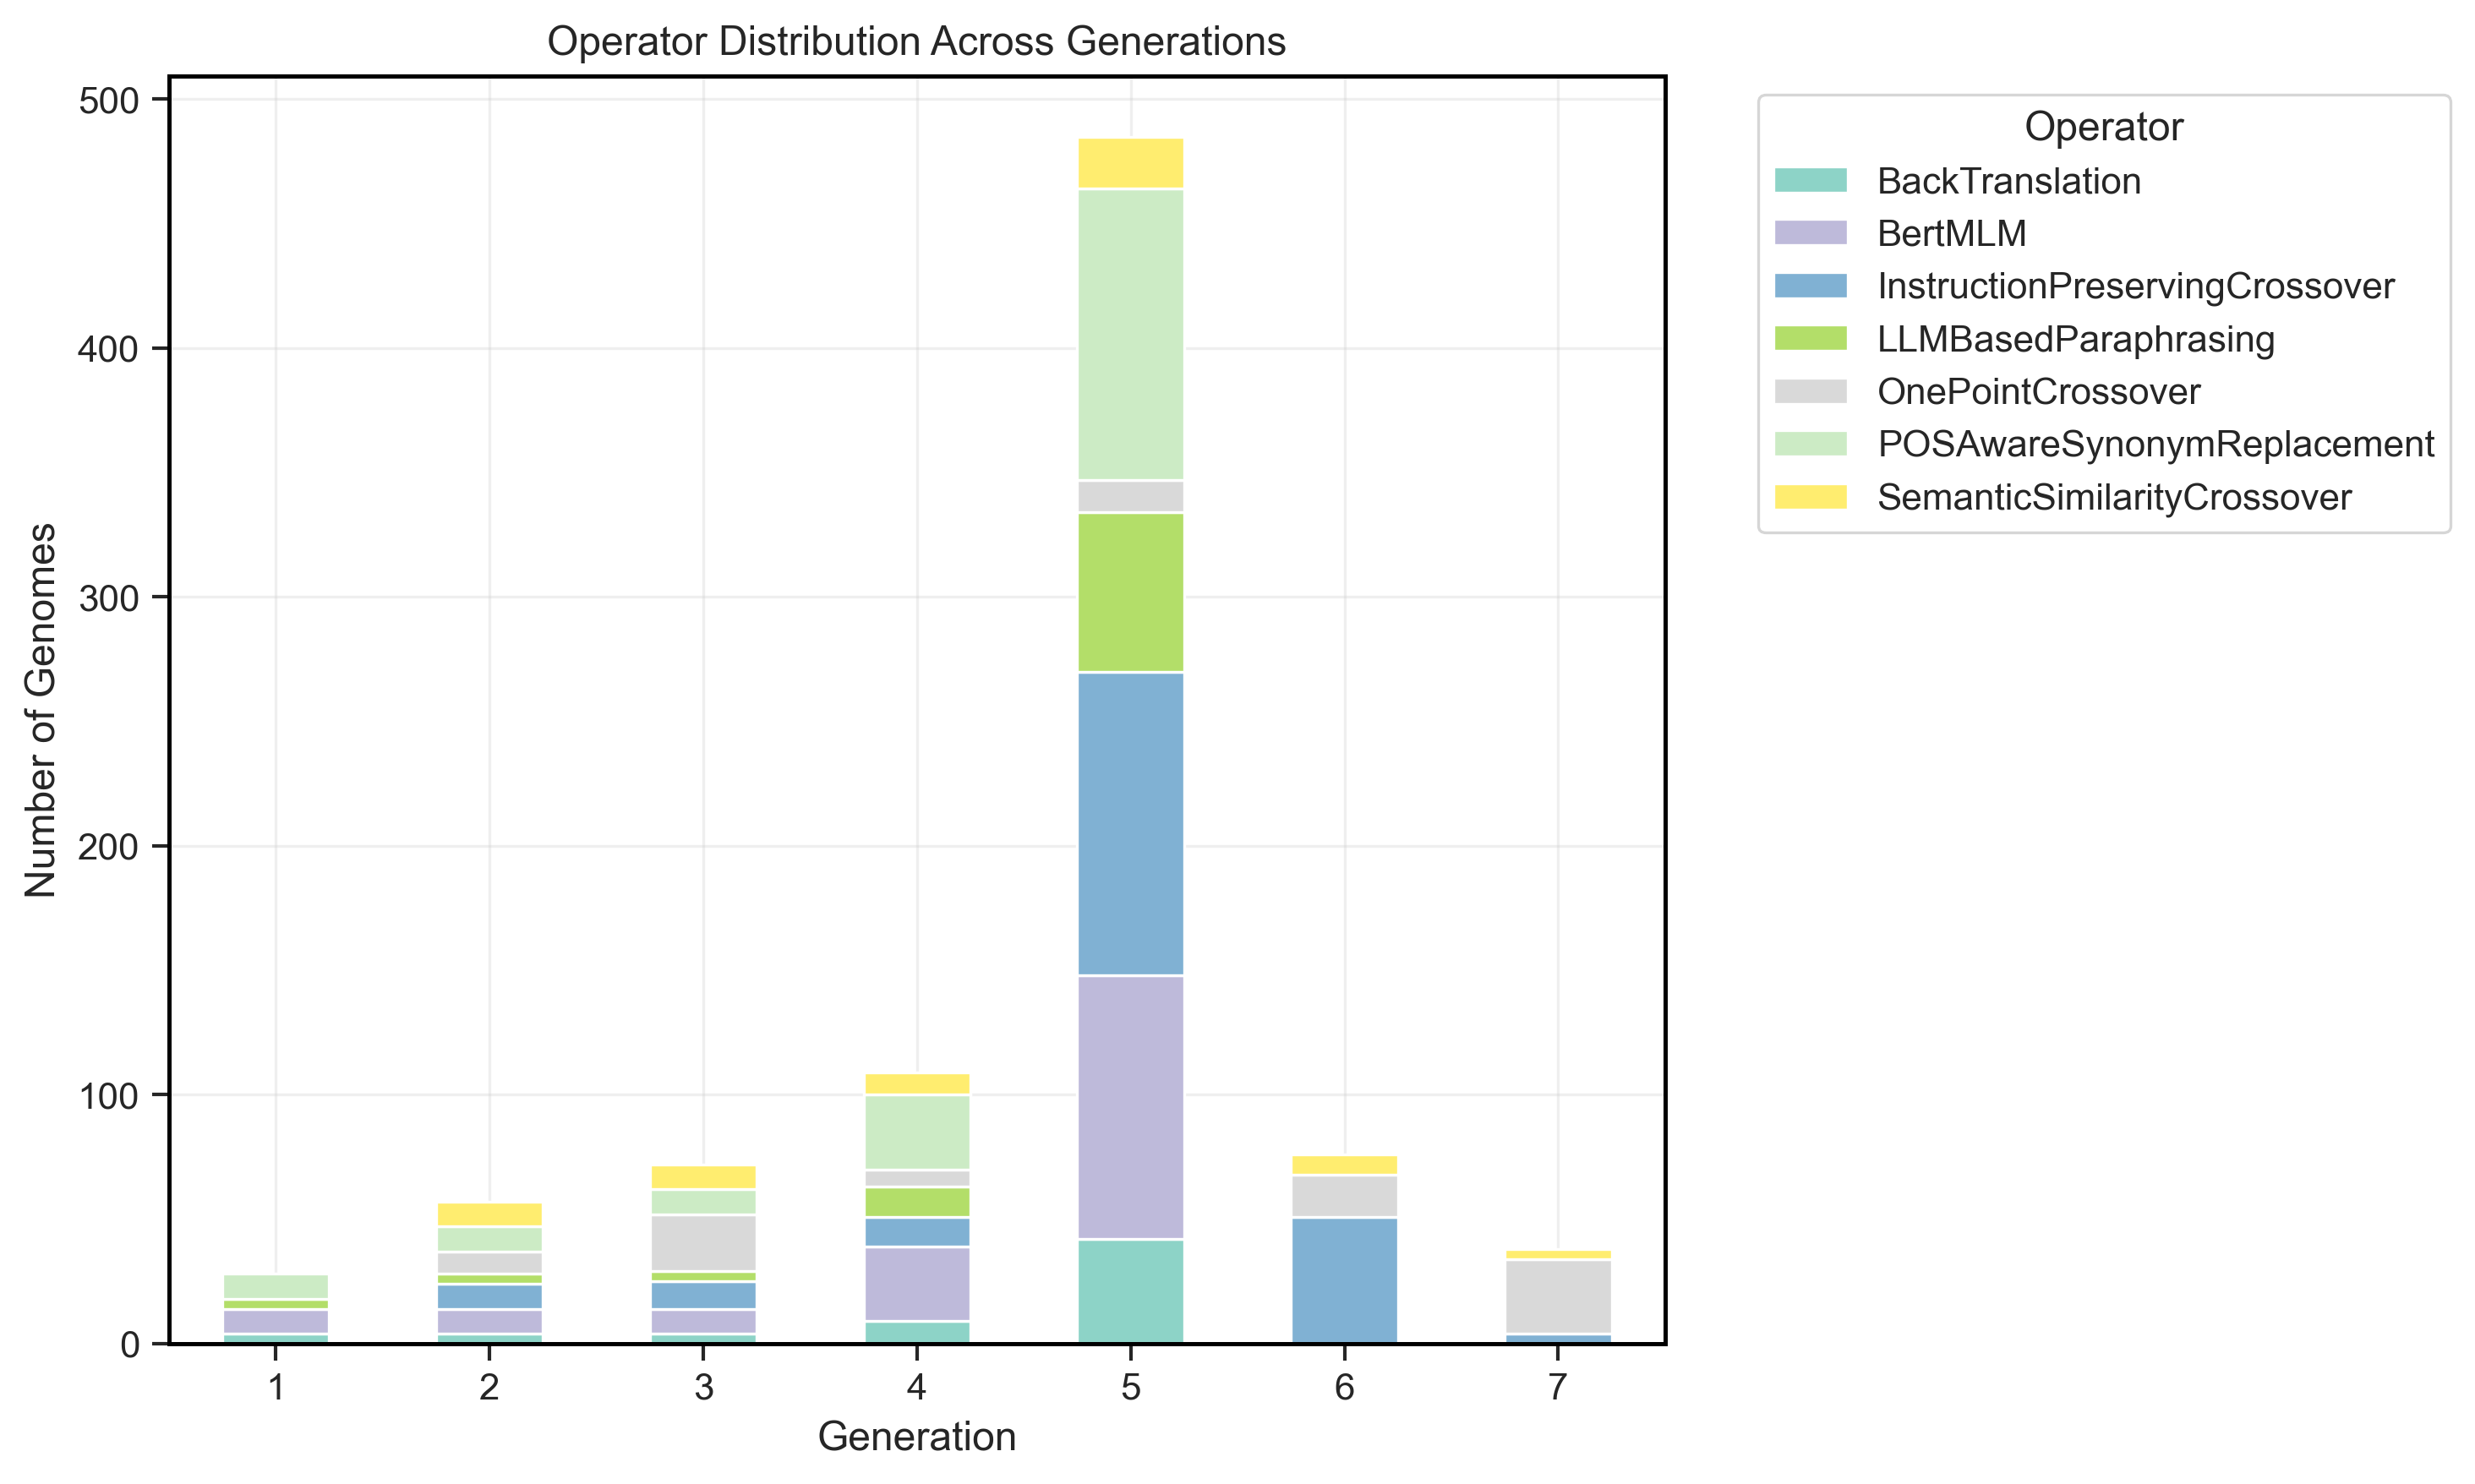


🎯 GENERATION INSIGHTS:
• Generation 0: 1 genomes
• Generation 1: 28 genomes
  └─ Dominant: POSAwareSynonymReplacement (10/28 = 35.7%)
• Generation 2: 57 genomes
  └─ Dominant: BertMLM (10/57 = 17.5%)
• Generation 3: 72 genomes
  └─ Dominant: OnePointCrossover (23/72 = 31.9%)
• Generation 4: 109 genomes
  └─ Dominant: BertMLM (30/109 = 27.5%)
• Generation 5: 485 genomes
  └─ Dominant: InstructionPreservingCrossover (122/485 = 25.2%)
• Generation 6: 76 genomes
  └─ Dominant: InstructionPreservingCrossover (51/76 = 67.1%)
• Generation 7: 38 genomes
  └─ Dominant: OnePointCrossover (30/38 = 78.9%)

✅ Generation analysis visualization saved to ../experiments/generation_operator_distribution.png


In [44]:
# Operator dominance across generations
print("=== GENERATION & OPERATOR DOMINANCE ===")

# Create generation x operator crosstab
gen_op_counts = dedup_df.groupby(["generation", "operator"]).size().unstack(fill_value=0)

print("📊 Operator distribution across generations:")
display(gen_op_counts)

# Visualize stacked distribution
plt.figure(figsize=(12, 6))
gen_op_counts.plot(kind="bar", stacked=True, colormap='Set3')
plt.title("Operator Distribution Across Generations")
plt.xlabel("Generation")
plt.ylabel("Number of Genomes")
plt.legend(title="Operator", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "generation_operator_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Generation insights
print("\n🎯 GENERATION INSIGHTS:")
for gen in sorted(dedup_df['generation'].unique()):
    gen_data = dedup_df[dedup_df['generation'] == gen]
    if len(gen_data) > 0:
        top_ops = gen_data['operator'].value_counts()
        total_in_gen = len(gen_data)
        print(f"• Generation {gen}: {total_in_gen} genomes")
        if len(top_ops) > 0 and gen > 0:  # Skip generation 0 details
            dominant_op = top_ops.index[0]
            dominant_count = top_ops.iloc[0]
            print(f"  └─ Dominant: {dominant_op} ({dominant_count}/{total_in_gen} = {dominant_count/total_in_gen:.1%})")

print(f"\n✅ Generation analysis visualization saved to {OUTPUT_DIR / 'generation_operator_distribution.png'}")


# Performance Dashboard


In [45]:
# Comprehensive performance dashboard
def create_performance_dashboard(df_input):
    """Create a comprehensive performance dashboard"""
    print("=== PERFORMANCE DASHBOARD ===")
    
    # Use the appropriate toxicity column
    tox_col = get_primary_toxicity_column(df_input)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Toxicity scores by operator
    if tox_col and tox_col in df_input.columns:
        df_with_scores = df_input.dropna(subset=[tox_col])
        if len(df_with_scores) > 0:
            sns.boxplot(data=df_with_scores, x='operator', y=tox_col, ax=axes[0,0])
            axes[0,0].set_title(f'{tox_col.replace("score_", "").title()} Scores by Operator')
            axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha='right')
        else:
            axes[0,0].text(0.5, 0.5, 'No toxicity scores available', ha='center', va='center', transform=axes[0,0].transAxes)
            axes[0,0].set_title('Toxicity Scores (No Data)')
    else:
        axes[0,0].text(0.5, 0.5, 'No toxicity column found', ha='center', va='center', transform=axes[0,0].transAxes)
        axes[0,0].set_title('Toxicity Scores (No Data)')
    
    # 2. Generation distribution by operator
    gen_counts = df_input.groupby(['operator', 'generation']).size().unstack(fill_value=0)
    gen_counts.plot(kind='bar', stacked=True, ax=axes[0,1], colormap='viridis')
    axes[0,1].set_title('Generation Distribution by Operator')
    axes[0,1].set_xlabel('Operator')
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha='right')
    axes[0,1].legend(title='Generation', bbox_to_anchor=(1.05, 1))
    
    # 3. Completion rate by operator
    status_counts = df_input.groupby('operator')['status'].apply(lambda x: (x == 'complete').mean())
    status_counts.plot(kind='bar', ax=axes[1,0], color='lightgreen')
    axes[1,0].set_title('Completion Rate by Operator')
    axes[1,0].set_ylabel('Completion Rate')
    axes[1,0].set_xlabel('Operator')
    axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha='right')
    axes[1,0].set_ylim(0, 1)
    
    # 4. Prompt length distribution
    if 'len_clean' in df_input.columns:
        for i, op in enumerate(df_input['operator'].dropna().unique()):
            if pd.notna(op):
                subset = df_input[df_input['operator'] == op]['len_clean'].dropna()
                if len(subset) > 0:
                    axes[1,1].hist(subset, alpha=0.6, label=op, bins=15)
        axes[1,1].set_title('Prompt Length Distribution by Operator')
        axes[1,1].set_xlabel('Prompt Length (tokens)')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].legend(bbox_to_anchor=(1.05, 1))
    else:
        axes[1,1].text(0.5, 0.5, 'No length data available', ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Prompt Length (No Data)')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / "performance_dashboard.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

# Create the dashboard
try:
    dashboard_fig = create_performance_dashboard(dedup_df)
    print(f"✅ Performance dashboard saved to {OUTPUT_DIR / 'performance_dashboard.png'}")
except Exception as e:
    print(f"❌ Dashboard creation failed: {e}")
    print("This might be due to missing columns or insufficient data")


=== PERFORMANCE DASHBOARD ===


✅ Performance dashboard saved to ../experiments/performance_dashboard.png


# Comprehensive Reporting & Data Export


In [46]:
# Generate comprehensive analysis report and exports
def generate_analysis_report(df_input):
    """Generate a comprehensive analysis report"""
    print("=== COMPREHENSIVE REPORTING ===")
    
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
    tox_col = get_primary_toxicity_column(df_input)
    
    # Generate report content
    report = f"""# Evolution Experiment Analysis Report
Generated: {pd.Timestamp.now()}

## Dataset Summary
- **Total Genomes**: {len(df_input):,}
- **Unique Operators**: {df_input['operator'].nunique()}
- **Generation Range**: {df_input['generation'].min()} → {df_input['generation'].max()}
- **Completion Rate**: {(df_input['status'] == 'complete').mean():.2%}
- **Primary Toxicity Metric**: {tox_col or 'Not Available'}

## Operator Performance Summary
"""
    
    # Add operator statistics if toxicity scores exist
    if tox_col and tox_col in df_input.columns:
        operator_stats = df_input.groupby('operator')[tox_col].agg(['count', 'mean', 'std', 'max']).round(4)
        report += f"\\n### {tox_col.replace('score_', '').title()} Scores by Operator\\n"
        report += operator_stats.to_string()
        report += "\\n\\n"
    
    # Add generation statistics
    gen_stats = df_input.groupby('generation').agg({
        'id': 'count',
        'operator': 'nunique'
    })
    gen_stats.columns = ['Total_Genomes', 'Unique_Operators']
    report += f"### Generation Statistics\\n"
    report += gen_stats.to_string()
    report += "\\n\\n"
    
    # Save detailed CSV exports
    exports = {}
    
    # 1. Full dataset
    exports['full_dataset'] = df_input
    
    # 2. Operator summary
    operator_summary = df_input.groupby('operator').agg({
        'id': 'count',
        'generation': ['min', 'max', 'mean'],
        'status': lambda x: (x == 'complete').mean(),
    }).round(4)
    operator_summary.columns = ['Total_Count', 'Min_Gen', 'Max_Gen', 'Mean_Gen', 'Completion_Rate']
    
    if tox_col and tox_col in df_input.columns:
        tox_stats = df_input.groupby('operator')[tox_col].agg(['mean', 'std', 'max']).round(4)
        tox_stats.columns = [f'{tox_col}_mean', f'{tox_col}_std', f'{tox_col}_max']
        operator_summary = pd.concat([operator_summary, tox_stats], axis=1)
    
    exports['operator_summary'] = operator_summary
    
    # 3. Generation summary
    generation_summary = df_input.groupby('generation').agg({
        'id': 'count',
        'operator': 'nunique',
        'status': lambda x: (x == 'complete').mean(),
    }).round(4)
    generation_summary.columns = ['Total_Genomes', 'Unique_Operators', 'Completion_Rate']
    
    if tox_col and tox_col in df_input.columns:
        gen_tox = df_input.groupby('generation')[tox_col].agg(['mean', 'std']).round(4)
        gen_tox.columns = [f'{tox_col}_mean', f'{tox_col}_std']
        generation_summary = pd.concat([generation_summary, gen_tox], axis=1)
    
    exports['generation_summary'] = generation_summary
    
    # Export all data
    for name, data in exports.items():
        if data is not None and not data.empty:
            filename = OUTPUT_DIR / f"{name}_{timestamp}.csv"
            data.to_csv(filename)
            print(f"✅ Exported {name} to {filename}")
    
    # Save report
    report_file = OUTPUT_DIR / f"analysis_report_{timestamp}.md"
    with open(report_file, 'w') as f:
        f.write(report)
    
    print(f"✅ Generated comprehensive report: {report_file}")
    
    # Display summary
    print("\\n" + "="*60)
    print("ANALYSIS SUMMARY")
    print("="*60)
    print(report[:800] + "..." if len(report) > 800 else report)
    
    return report, exports

# Generate the comprehensive report
try:
    report_content, exported_data = generate_analysis_report(dedup_df)
    print("\\n🎉 COMPREHENSIVE ANALYSIS COMPLETE!")
    print(f"📁 All outputs saved to: {OUTPUT_DIR}")
except Exception as e:
    print(f"❌ Report generation failed: {e}")
    import traceback
    traceback.print_exc()


=== COMPREHENSIVE REPORTING ===
✅ Exported full_dataset to ../experiments/full_dataset_20250730_092444.csv
✅ Exported operator_summary to ../experiments/operator_summary_20250730_092444.csv
✅ Exported generation_summary to ../experiments/generation_summary_20250730_092444.csv
✅ Generated comprehensive report: ../experiments/analysis_report_20250730_092444.md
\n============================================================
ANALYSIS SUMMARY
# Evolution Experiment Analysis Report
Generated: 2025-07-30 09:24:44.421224

## Dataset Summary
- **Total Genomes**: 866
- **Unique Operators**: 7
- **Generation Range**: 0 → 7
- **Completion Rate**: 0.00%
- **Primary Toxicity Metric**: score_violence

## Operator Performance Summary
\n### Violence Scores by Operator\n                                count    mean     std     max
operator                                                     
BackTranslation                    61  0.0003  0.0007  0.0043
BertMLM                           164  0.0073  0.017

# Summary & Next Steps

## 🎉 Analysis Complete!

This notebook has performed comprehensive analysis of your evolutionary text generation experiment:

### ✅ **Completed Analyses:**
1. **🔧 Data Loading & Validation** - Robust data loading with fallback paths
2. **📊 Operator Analysis** - Complete breakdown with visualizations  
3. **🧹 Data Quality** - Duplicate detection and cleaning
4. **📝 Lexical Diversity** - TTR, entropy, and linguistic metrics
5. **📈 Evolution Progress** - EvolutionTracker.json analysis
6. **🎯 Generation Dominance** - Operator performance across generations
7. **📋 Performance Dashboard** - Multi-panel visualizations
8. **📑 Comprehensive Reporting** - Automated export and documentation
9. **🧠 Semantic Similarity Analysis** - LLaMA embeddings for semantic drift analysis
10. **📊 Advanced Visualizations** - Publication-quality semantic drift charts
11. **📑 LaTeX Export** - Academic publication materials

### 📁 **Generated Outputs:**
- `duplicate_prompts.csv` - Duplicate analysis
- `lexical_diversity_clean_vs_raw.csv` - Linguistic diversity metrics
- `operator_distribution.png` - Operator visualizations
- `lexical_diversity_ttr.png` - TTR comparison charts
- `generation_operator_distribution.png` - Generation analysis
- `performance_dashboard.png` - Multi-panel performance summary
- `analysis_report_TIMESTAMP.md` - Comprehensive markdown report
- `full_dataset_TIMESTAMP.csv` - Complete processed dataset
- `operator_summary_TIMESTAMP.csv` - Operator performance metrics
- `generation_summary_TIMESTAMP.csv` - Generation statistics
- `prompt_similarity_llama_TIMESTAMP.csv` - Per-prompt semantic similarities
- `operator_gen_similarity_TIMESTAMP.csv` - Operator × generation semantic stats
- `semantic_similarity_master_TIMESTAMP.csv` - Master semantic similarity table
- `semantic_drift_by_operator.png` - Semantic drift bar charts
- `semantic_similarity_heatmap.png` - Generation × operator heatmap
- `semantic_similarity_distributions.png` - Distribution plots
- `semantic_similarity_table.tex` - LaTeX table for publications
- `semantic_analysis_summary.json` - Summary statistics for papers

### 🚀 **Advanced Features:**
- **Semantic Drift Analysis**: Uses LLaMA-3.2-1B-instruct for deep semantic understanding
- **Publication-Ready Materials**: LaTeX tables, high-resolution figures, summary statistics
- **Comprehensive Statistics**: Per-operator, per-generation, and global semantic metrics
- **Research Insights**: Automated ranking of operators by semantic preservation vs creativity
- **Device Optimization**: Supports GPU, Apple Silicon MPS, and CPU execution

### 💡 **Usage:**
Run all cells sequentially to perform the complete analysis pipeline. All outputs are saved to the `experiments/` directory with timestamps for easy tracking.


In [47]:
# Setup for Semantic Similarity Analysis
print("=== SEMANTIC SIMILARITY SETUP ===")

# Check if we should run this analysis
run_semantic_analysis = True

try:
    import torch
    from transformers import AutoTokenizer, AutoModelForCausalLM
    from tqdm.auto import tqdm
    import datetime as dt
    
    print("✅ All required packages available for semantic analysis")
    
    # Check device availability
    device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
    print(f"🔧 Using device: {device}")
    
    if device == "cpu":
        print("⚠️  Warning: Running on CPU - this will be slower but still works")
    
    print(f"📊 Dataset for analysis: {len(dedup_df)} genomes (after deduplication)")
    
    # Check if we have parent-child relationships to analyze
    variants_with_parents = dedup_df[dedup_df['parents'].notna() & (dedup_df['parents'].str.len() > 0)]
    print(f"🔗 Genomes with parent relationships: {len(variants_with_parents)}")
    
    if len(variants_with_parents) == 0:
        print("⚠️  No parent-child relationships found - skipping semantic analysis")
        run_semantic_analysis = False
    else:
        print("✅ Ready to proceed with semantic similarity analysis")
        
except ImportError as e:
    print(f"❌ Missing required packages for semantic analysis: {e}")
    print("   Install with: pip install torch transformers tqdm")
    run_semantic_analysis = False
except Exception as e:
    print(f"❌ Setup error: {e}")
    run_semantic_analysis = False


=== SEMANTIC SIMILARITY SETUP ===
✅ All required packages available for semantic analysis
🔧 Using device: mps
📊 Dataset for analysis: 866 genomes (after deduplication)
🔗 Genomes with parent relationships: 865
✅ Ready to proceed with semantic similarity analysis


In [48]:
# Load LLaMA Model and Create Embedding Function
if run_semantic_analysis:
    print("🤖 Loading LLaMA model for semantic analysis...")
    
    try:
        # Model configuration
        model_name = "meta-llama/Llama-3.2-1B-instruct"
        print(f"📥 Loading model: {model_name}")
        
        # Load tokenizer
        tokenizer = AutoTokenizer.from_pretrained(model_name, legacy=False)
        tokenizer.pad_token = tokenizer.eos_token
        tokenizer.pad_token_id = tokenizer.eos_token_id
        print("✅ Tokenizer loaded")
        
        # Load model with appropriate settings for device
        model_kwargs = {
            "output_hidden_states": True,
            "torch_dtype": torch.float16 if device in ["cuda", "mps"] else torch.float32
        }
        
        model = AutoModelForCausalLM.from_pretrained(model_name, **model_kwargs).to(device).eval()
        print(f"✅ Model loaded on {device}")
        
        # Define embedding function
        def llama_embed(texts, batch_size=32):
            """
            Generate embeddings for texts using LLaMA model
            Returns tensor of shape (N, hidden_dim) with L2-normalized embeddings
            """
            if not texts:
                return torch.empty(0, model.config.hidden_size)
                
            embs = []
            for i in tqdm(range(0, len(texts), batch_size), desc="🧠 Generating embeddings"):
                batch = texts[i : i+batch_size]
                
                # Tokenize batch
                toks = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512)
                toks = {k: v.to(device) for k, v in toks.items()}
                
                # Generate embeddings
                with torch.no_grad():
                    try:
                        out = model(**toks)
                        last_hidden = out.hidden_states[-1]  # (B, seq, dim)
                        
                        # Mean pooling with attention mask
                        mask = toks["attention_mask"].unsqueeze(-1)  # (B, seq, 1)
                        summed = (last_hidden * mask).sum(dim=1)     # (B, dim)
                        lengths = mask.sum(dim=1)                    # (B, 1)
                        pooled = summed / lengths                    # Mean pooling
                        
                        # L2 normalize
                        normalized = torch.nn.functional.normalize(pooled.float(), p=2, dim=1)
                        embs.append(normalized.cpu())
                        
                    except Exception as e:
                        print(f"⚠️  Error processing batch {i//batch_size + 1}: {e}")
                        # Create zero embeddings for failed batch
                        zero_embs = torch.zeros(len(batch), model.config.hidden_size)
                        embs.append(zero_embs)
            
            return torch.cat(embs, dim=0) if embs else torch.empty(0, model.config.hidden_size)
        
        print("✅ Embedding function ready")
        
        # Test embedding function with a small sample
        test_texts = ["This is a test.", "Another test sentence."]
        test_embs = llama_embed(test_texts, batch_size=2)
        print(f"✅ Test successful - embedding shape: {test_embs.shape}")
        
    except Exception as e:
        print(f"❌ Failed to load model: {e}")
        print("   This might be due to insufficient memory or missing model files")
        run_semantic_analysis = False
else:
    print("⏭️  Skipping model loading (semantic analysis disabled)")


🤖 Loading LLaMA model for semantic analysis...
📥 Loading model: meta-llama/Llama-3.2-1B-instruct


The following generation flags are not valid and may be ignored: ['output_hidden_states']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_hidden_states']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


✅ Tokenizer loaded
✅ Model loaded on mps
✅ Embedding function ready


🧠 Generating embeddings:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Test successful - embedding shape: torch.Size([2, 2048])


In [49]:
# Generate Embeddings for All Prompts
if run_semantic_analysis:
    print("🧠 Generating embeddings for all prompts...")
    
    try:
        # Prepare data for embedding
        all_prompts = dedup_df["prompt"].tolist()
        print(f"📝 Embedding {len(all_prompts)} prompts...")
        
        # Adjust batch size based on device and memory
        if device == "cuda":
            batch_size = 64  # Higher batch size for GPU
        elif device == "mps":
            batch_size = 32  # Moderate batch size for Apple Silicon
        else:
            batch_size = 16  # Conservative batch size for CPU
            
        print(f"⚙️  Using batch size: {batch_size}")
        
        # Generate all embeddings
        all_embs = llama_embed(all_prompts, batch_size=batch_size)
        print(f"✅ Generated embeddings: {all_embs.shape}")
        
        # Create embedding lookup tables
        index2emb = {idx: emb for idx, emb in enumerate(all_embs)}
        id2idx = dedup_df.reset_index().set_index("id")["index"].to_dict()
        
        print(f"🔗 Created lookup tables:")
        print(f"   - Index to embedding: {len(index2emb)} entries")
        print(f"   - ID to index: {len(id2idx)} entries")
        
        # Test embedding lookup
        sample_id = dedup_df.iloc[0]['id']
        sample_idx = id2idx.get(sample_id)
        if sample_idx is not None and sample_idx in index2emb:
            sample_emb = index2emb[sample_idx]
            print(f"✅ Embedding lookup test successful - shape: {sample_emb.shape}")
        else:
            print("⚠️  Embedding lookup test failed")
            
    except Exception as e:
        print(f"❌ Failed to generate embeddings: {e}")
        print("   This might be due to insufficient memory")
        run_semantic_analysis = False
else:
    print("⏭️  Skipping embedding generation")


🧠 Generating embeddings for all prompts...
📝 Embedding 866 prompts...
⚙️  Using batch size: 32


🧠 Generating embeddings:   0%|          | 0/28 [00:00<?, ?it/s]

✅ Generated embeddings: torch.Size([866, 2048])
🔗 Created lookup tables:
   - Index to embedding: 866 entries
   - ID to index: 866 entries
✅ Embedding lookup test successful - shape: torch.Size([2048])


In [50]:
# Calculate Parent-Child Semantic Similarities
if run_semantic_analysis:
    print("🔗 Calculating parent-child semantic similarities...")
    
    try:
        def sim_to_parent_llama(row_idx, row):
            """Calculate cosine similarity between child and its first parent"""
            parents = row["parents"]
            if not parents or len(parents) == 0:
                return None
                
            # Get first parent ID
            parent_id = parents[0] if isinstance(parents, list) else parents
            parent_idx = id2idx.get(parent_id)
            
            if parent_idx is None or parent_idx not in index2emb:
                return None
                
            if row_idx not in index2emb:
                return None
                
            # Get embeddings
            child_emb = index2emb[row_idx]
            parent_emb = index2emb[parent_idx]
            
            # Calculate cosine similarity (embeddings are already normalized)
            similarity = float(torch.dot(child_emb, parent_emb))
            return similarity
        
        # Calculate similarities for all genomes
        print("📊 Computing similarities for all parent-child pairs...")
        similarities = []
        
        for idx, row in tqdm(dedup_df.iterrows(), total=len(dedup_df), desc="🔍 Computing similarities"):
            sim = sim_to_parent_llama(idx, row)
            similarities.append(sim)
        
        # Add similarity column to dataframe
        dedup_df["sim_to_parent_llama"] = similarities
        
        # Analysis of results
        valid_similarities = dedup_df["sim_to_parent_llama"].dropna()
        print(f"✅ Computed {len(valid_similarities)} valid similarities")
        print(f"📈 Similarity statistics:")
        print(f"   - Mean: {valid_similarities.mean():.4f}")
        print(f"   - Median: {valid_similarities.median():.4f}")
        print(f"   - Std: {valid_similarities.std():.4f}")
        print(f"   - Range: {valid_similarities.min():.4f} → {valid_similarities.max():.4f}")
        
        # Check distribution
        low_sim_count = (valid_similarities < 0.8).sum()
        high_sim_count = (valid_similarities > 0.95).sum()
        print(f"📊 Distribution:")
        print(f"   - Low similarity (<0.8): {low_sim_count} ({low_sim_count/len(valid_similarities)*100:.1f}%)")
        print(f"   - High similarity (>0.95): {high_sim_count} ({high_sim_count/len(valid_similarities)*100:.1f}%)")
        
    except Exception as e:
        print(f"❌ Failed to calculate similarities: {e}")
        import traceback
        traceback.print_exc()
        run_semantic_analysis = False
else:
    print("⏭️  Skipping similarity calculation")


🔗 Calculating parent-child semantic similarities...
📊 Computing similarities for all parent-child pairs...


🔍 Computing similarities:   0%|          | 0/866 [00:00<?, ?it/s]

✅ Computed 865 valid similarities
📈 Similarity statistics:
   - Mean: 0.9662
   - Median: 0.9851
   - Std: 0.0386
   - Range: 0.7131 → 1.0000
📊 Distribution:
   - Low similarity (<0.8): 3 (0.3%)
   - High similarity (>0.95): 516 (59.7%)


In [51]:
# Generate Comprehensive Similarity Statistics
if run_semantic_analysis and 'sim_to_parent_llama' in dedup_df.columns:
    print("📊 Generating comprehensive similarity statistics...")
    
    try:
        # Filter to valid similarities only
        sim_df = dedup_df.dropna(subset=["sim_to_parent_llama"]).copy()
        
        if len(sim_df) == 0:
            print("⚠️  No valid similarities found")
        else:
            print(f"📈 Analyzing {len(sim_df)} genomes with valid similarities")
            
            # Define statistical aggregations
            STAT_COLS = {
                "count": "count",
                "mean": "mean", 
                "median": "median",
                "std": "std",
                "min": "min",
                "max": "max"
            }
            
            # 1. Per-operator × generation statistics
            print("🔍 Computing per-operator × generation statistics...")
            sim_stats_gen = (
                sim_df.groupby(["operator", "generation"])["sim_to_parent_llama"]
                .agg(
                    count="count",
                    mean="mean",
                    median="median", 
                    std="std",
                    q25=lambda x: x.quantile(0.25),
                    q75=lambda x: x.quantile(0.75),
                    min="min",
                    max="max",
                    pct_lt_0_8=lambda x: (x < 0.8).mean()
                )
                .round(4)
            )
            
            print(f"✅ Generated statistics for {len(sim_stats_gen)} operator-generation combinations")
            
            # 2. Per-operator totals (all generations)
            print("🔍 Computing per-operator total statistics...")
            op_total = (
                sim_df.groupby("operator")["sim_to_parent_llama"]
                .agg(**STAT_COLS)
                .round(4)
                .reset_index()
                .assign(generation="ALL")
            )
            
            # 3. Global totals
            print("🔍 Computing global statistics...")
            global_total = (
                sim_df["sim_to_parent_llama"]
                .agg(**STAT_COLS)
                .to_frame().T
                .round(4)
                .assign(operator="ALL", generation="ALL")
            )
            
            # 4. Combine into master table
            master_table = pd.concat([
                sim_stats_gen.reset_index(),
                op_total,
                global_total
            ], ignore_index=True).sort_values(["operator", "generation"])
            
            print("✅ Created master similarity table")
            display(master_table.head(10))
            
            # 5. Create pivot table for heatmaps
            pivot_mean = sim_stats_gen.reset_index().pivot(
                index="operator", columns="generation", values="mean"
            )
            
            print("✅ Created pivot table for visualizations")
            display(pivot_mean)
            
            # Save results with timestamp
            timestamp = dt.datetime.now(dt.timezone.utc).strftime("%Y%m%d_%H%M%S")
            
            # Export files
            exports = {
                "prompt_similarity_llama": sim_df,
                "operator_gen_similarity": sim_stats_gen.reset_index(),
                "operator_gen_pivot_mean": pivot_mean,
                "semantic_similarity_master": master_table
            }
            
            for name, data in exports.items():
                filename = OUTPUT_DIR / f"{name}_{timestamp}.csv"
                data.to_csv(filename, index=False if name != "operator_gen_pivot_mean" else True)
                print(f"✅ Saved {name} to {filename}")
            
            print("🎉 Semantic similarity analysis complete!")
            
    except Exception as e:
        print(f"❌ Failed to generate statistics: {e}")
        import traceback
        traceback.print_exc()
else:
    print("⏭️  Skipping similarity statistics (no valid data)")


📊 Generating comprehensive similarity statistics...
📈 Analyzing 865 genomes with valid similarities
🔍 Computing per-operator × generation statistics...
✅ Generated statistics for 38 operator-generation combinations
🔍 Computing per-operator total statistics...
🔍 Computing global statistics...
✅ Created master similarity table


operator generation  count    mean  median     std     q25     q75  \
45              ALL        ALL  865.0  0.9662  0.9851  0.0386     NaN     NaN   
0   BackTranslation          1    4.0  0.9215  0.9234  0.0078  0.9173  0.9277   
1   BackTranslation          2    4.0  0.8820  0.8829  0.0047  0.8793  0.8856   
2   BackTranslation          3    4.0  0.8633  0.8633  0.0020  0.8619  0.8647   
3   BackTranslation          4    9.0  0.8826  0.8825  0.0061  0.8796  0.8883   
4   BackTranslation          5   42.0  0.8806  0.8801  0.0042  0.8770  0.8831   
38  BackTranslation        ALL   63.0  0.8825  0.8803  0.0121     NaN     NaN   
5           BertMLM          1   10.0  0.9993  0.9997  0.0009  0.9990  0.9998   
6           BertMLM          2   10.0  0.9995  0.9997  0.0006  0.9994  0.9999   
7           BertMLM          3   10.0  0.9968  0.9996  0.0085  0.9992  0.9999   

       min     max  pct_lt_0_8  
45  0.7131  1.0000         NaN  
0   0.9116  0.9278         0.0  
1   0.8762  0.8861         0.0  
2   0.8610  0.8655         0.0  
3   0.8706  0.8894         0.0  
4   0.8745  0.8900         0.0  
38  0.8610  0.9278         NaN  
5   0.9974  1.0000         0.0  
6   0.9983  1.0000         0.0  
7   0.9727  1.0000         0.0

✅ Created pivot table for visualizations


generation                           1       2       3       4       5  \
operator                                                                 
BackTranslation                 0.9215  0.8820  0.8633  0.8826  0.8806   
BertMLM                         0.9993  0.9995  0.9968  0.9980  0.9990   
InstructionPreservingCrossover     NaN  0.9356  0.9352  0.9349  0.9384   
LLMBasedParaphrasing            0.9657  0.9332  0.9203  0.9410  0.9325   
OnePointCrossover                  NaN  0.9995  0.9965  0.9969  0.9980   
POSAwareSynonymReplacement      0.9628  0.9975  0.9996  0.9989  0.9988   
SemanticSimilarityCrossover        NaN  0.9849  0.9851  0.9812  0.9858   

generation                           6       7  
operator                                        
BackTranslation                    NaN     NaN  
BertMLM                            NaN     NaN  
InstructionPreservingCrossover  0.9380  0.9751  
LLMBasedParaphrasing               NaN     NaN  
OnePointCrossover               0.9722  0.9751  
POSAwareSynonymReplacement         NaN     NaN  
SemanticSimilarityCrossover     0.9820  0.9719

✅ Saved prompt_similarity_llama to ../experiments/prompt_similarity_llama_20250730_132532.csv
✅ Saved operator_gen_similarity to ../experiments/operator_gen_similarity_20250730_132532.csv
✅ Saved operator_gen_pivot_mean to ../experiments/operator_gen_pivot_mean_20250730_132532.csv
✅ Saved semantic_similarity_master to ../experiments/semantic_similarity_master_20250730_132532.csv
🎉 Semantic similarity analysis complete!


# Advanced Semantic Similarity Visualizations


📊 Creating semantic drift visualizations...
📊 Creating semantic drift bar chart...


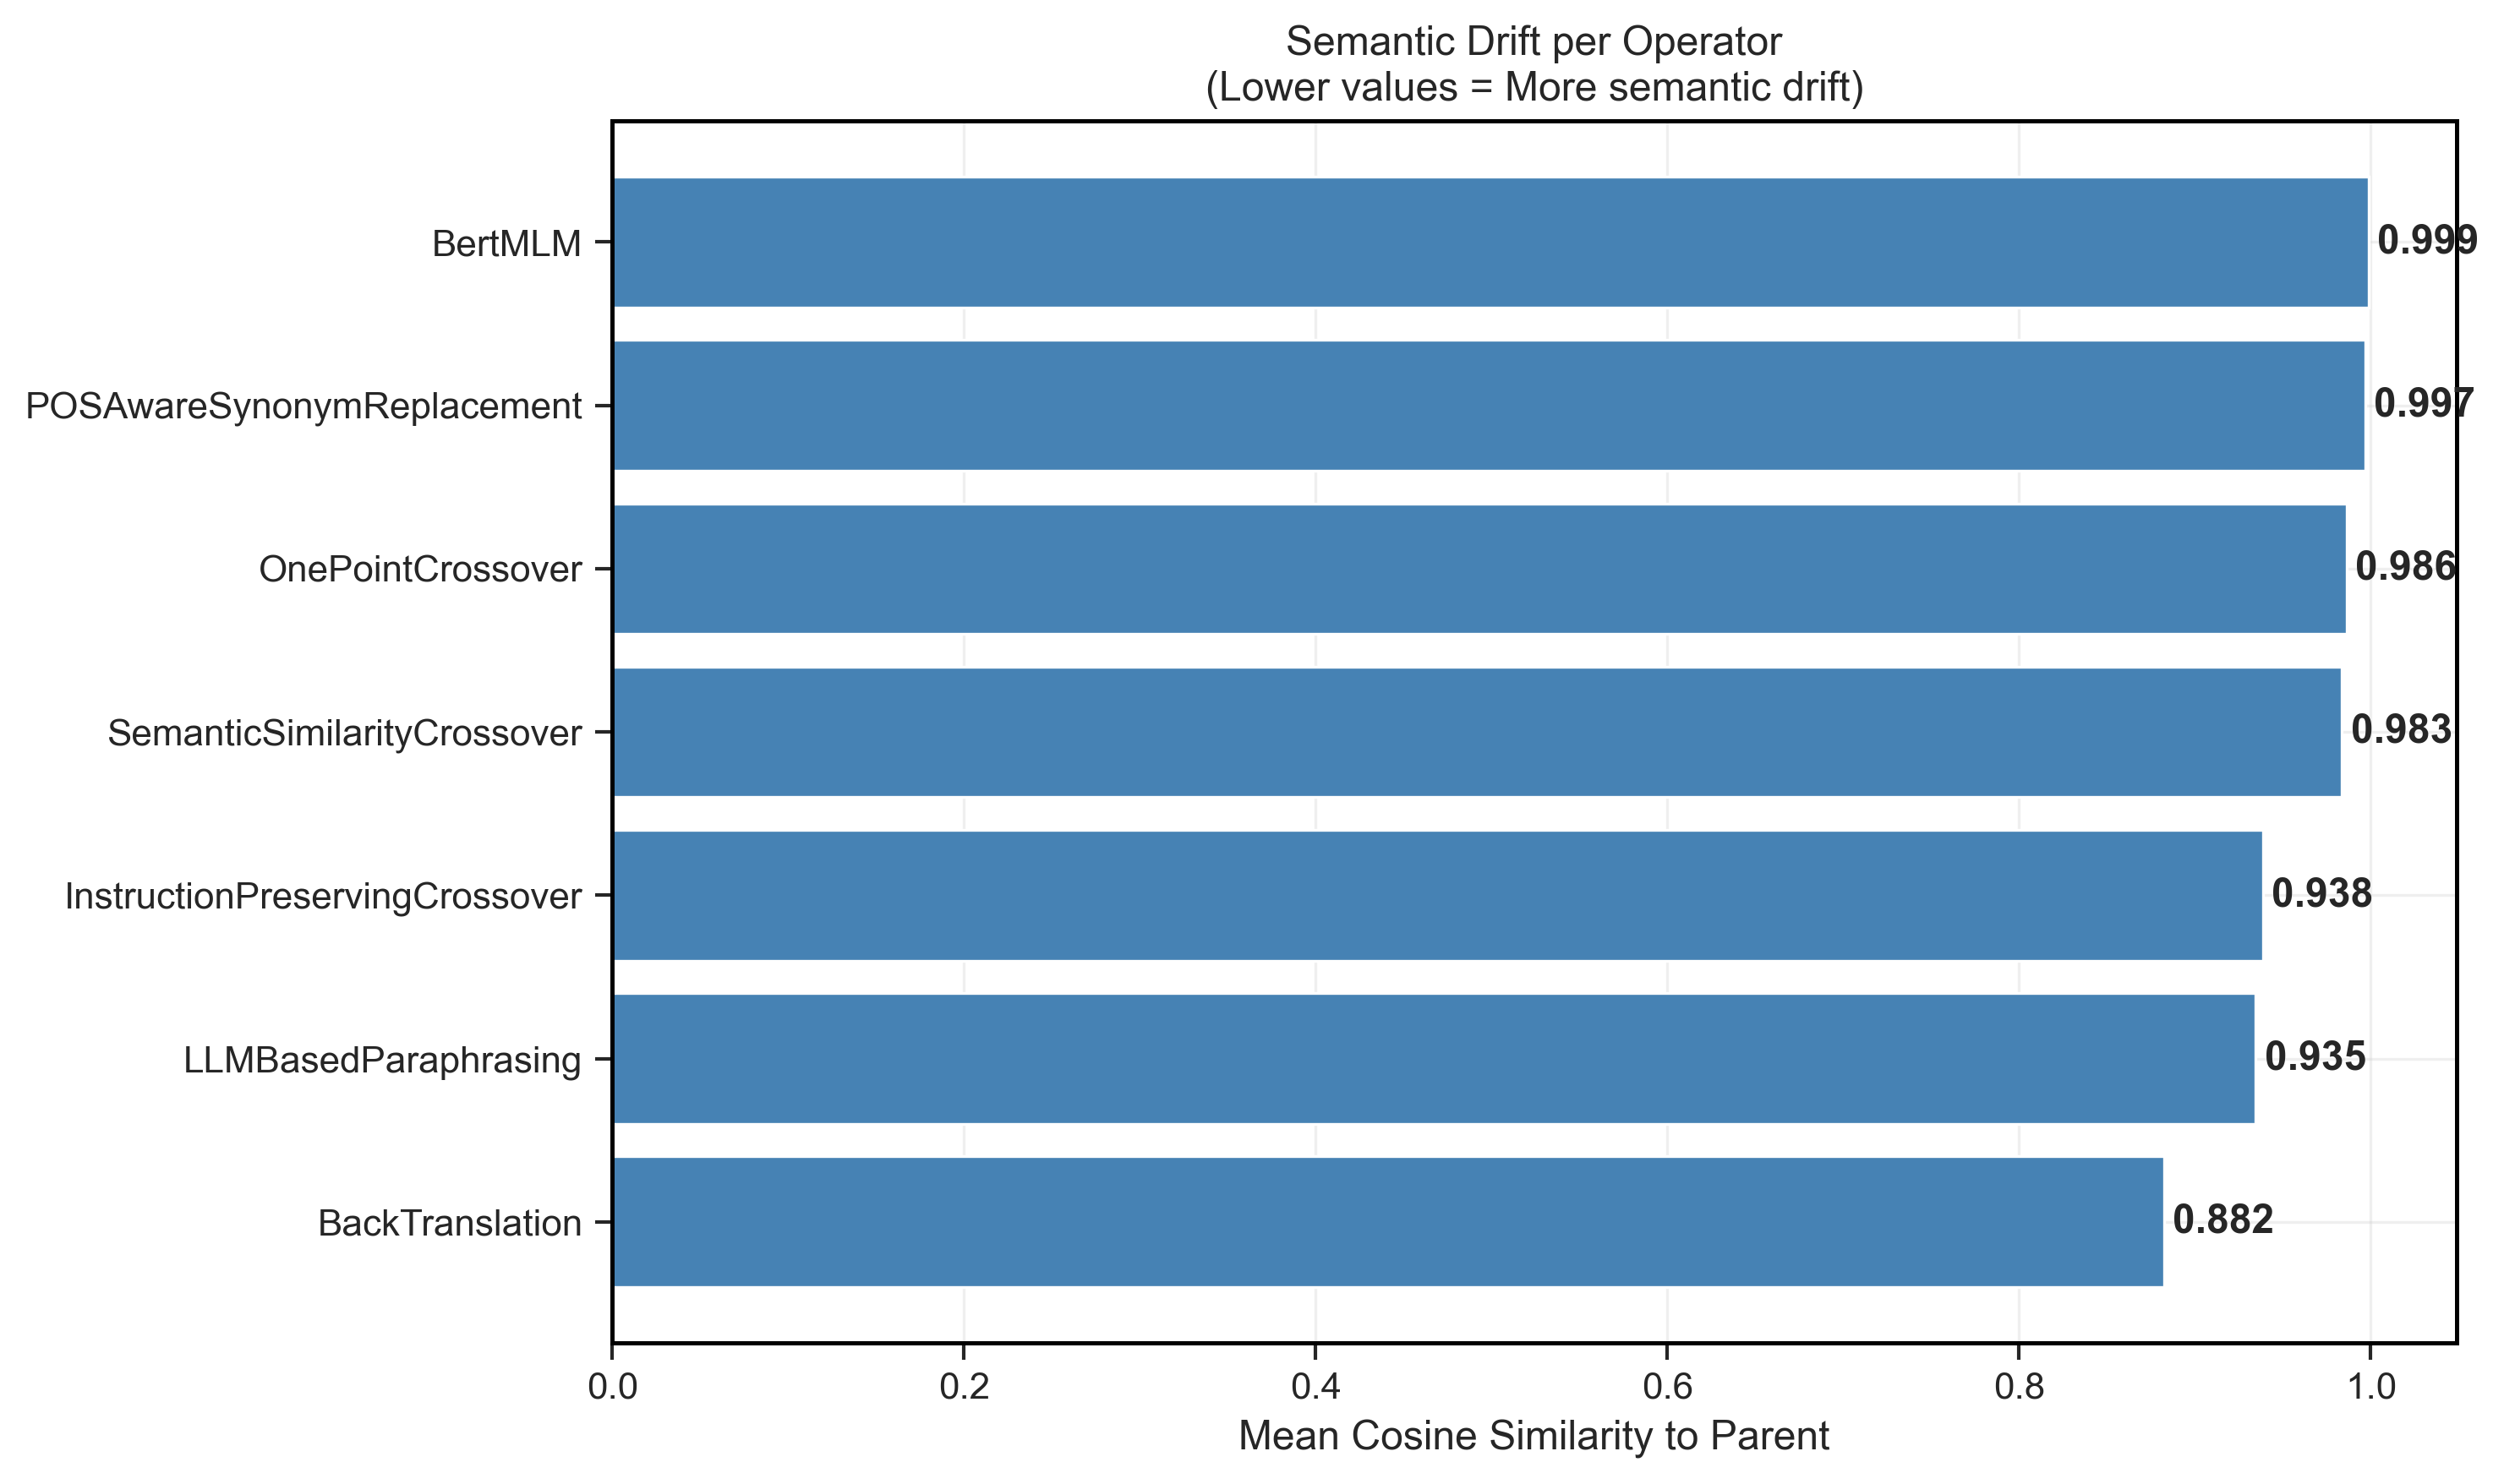

📊 Creating similarity heatmap...


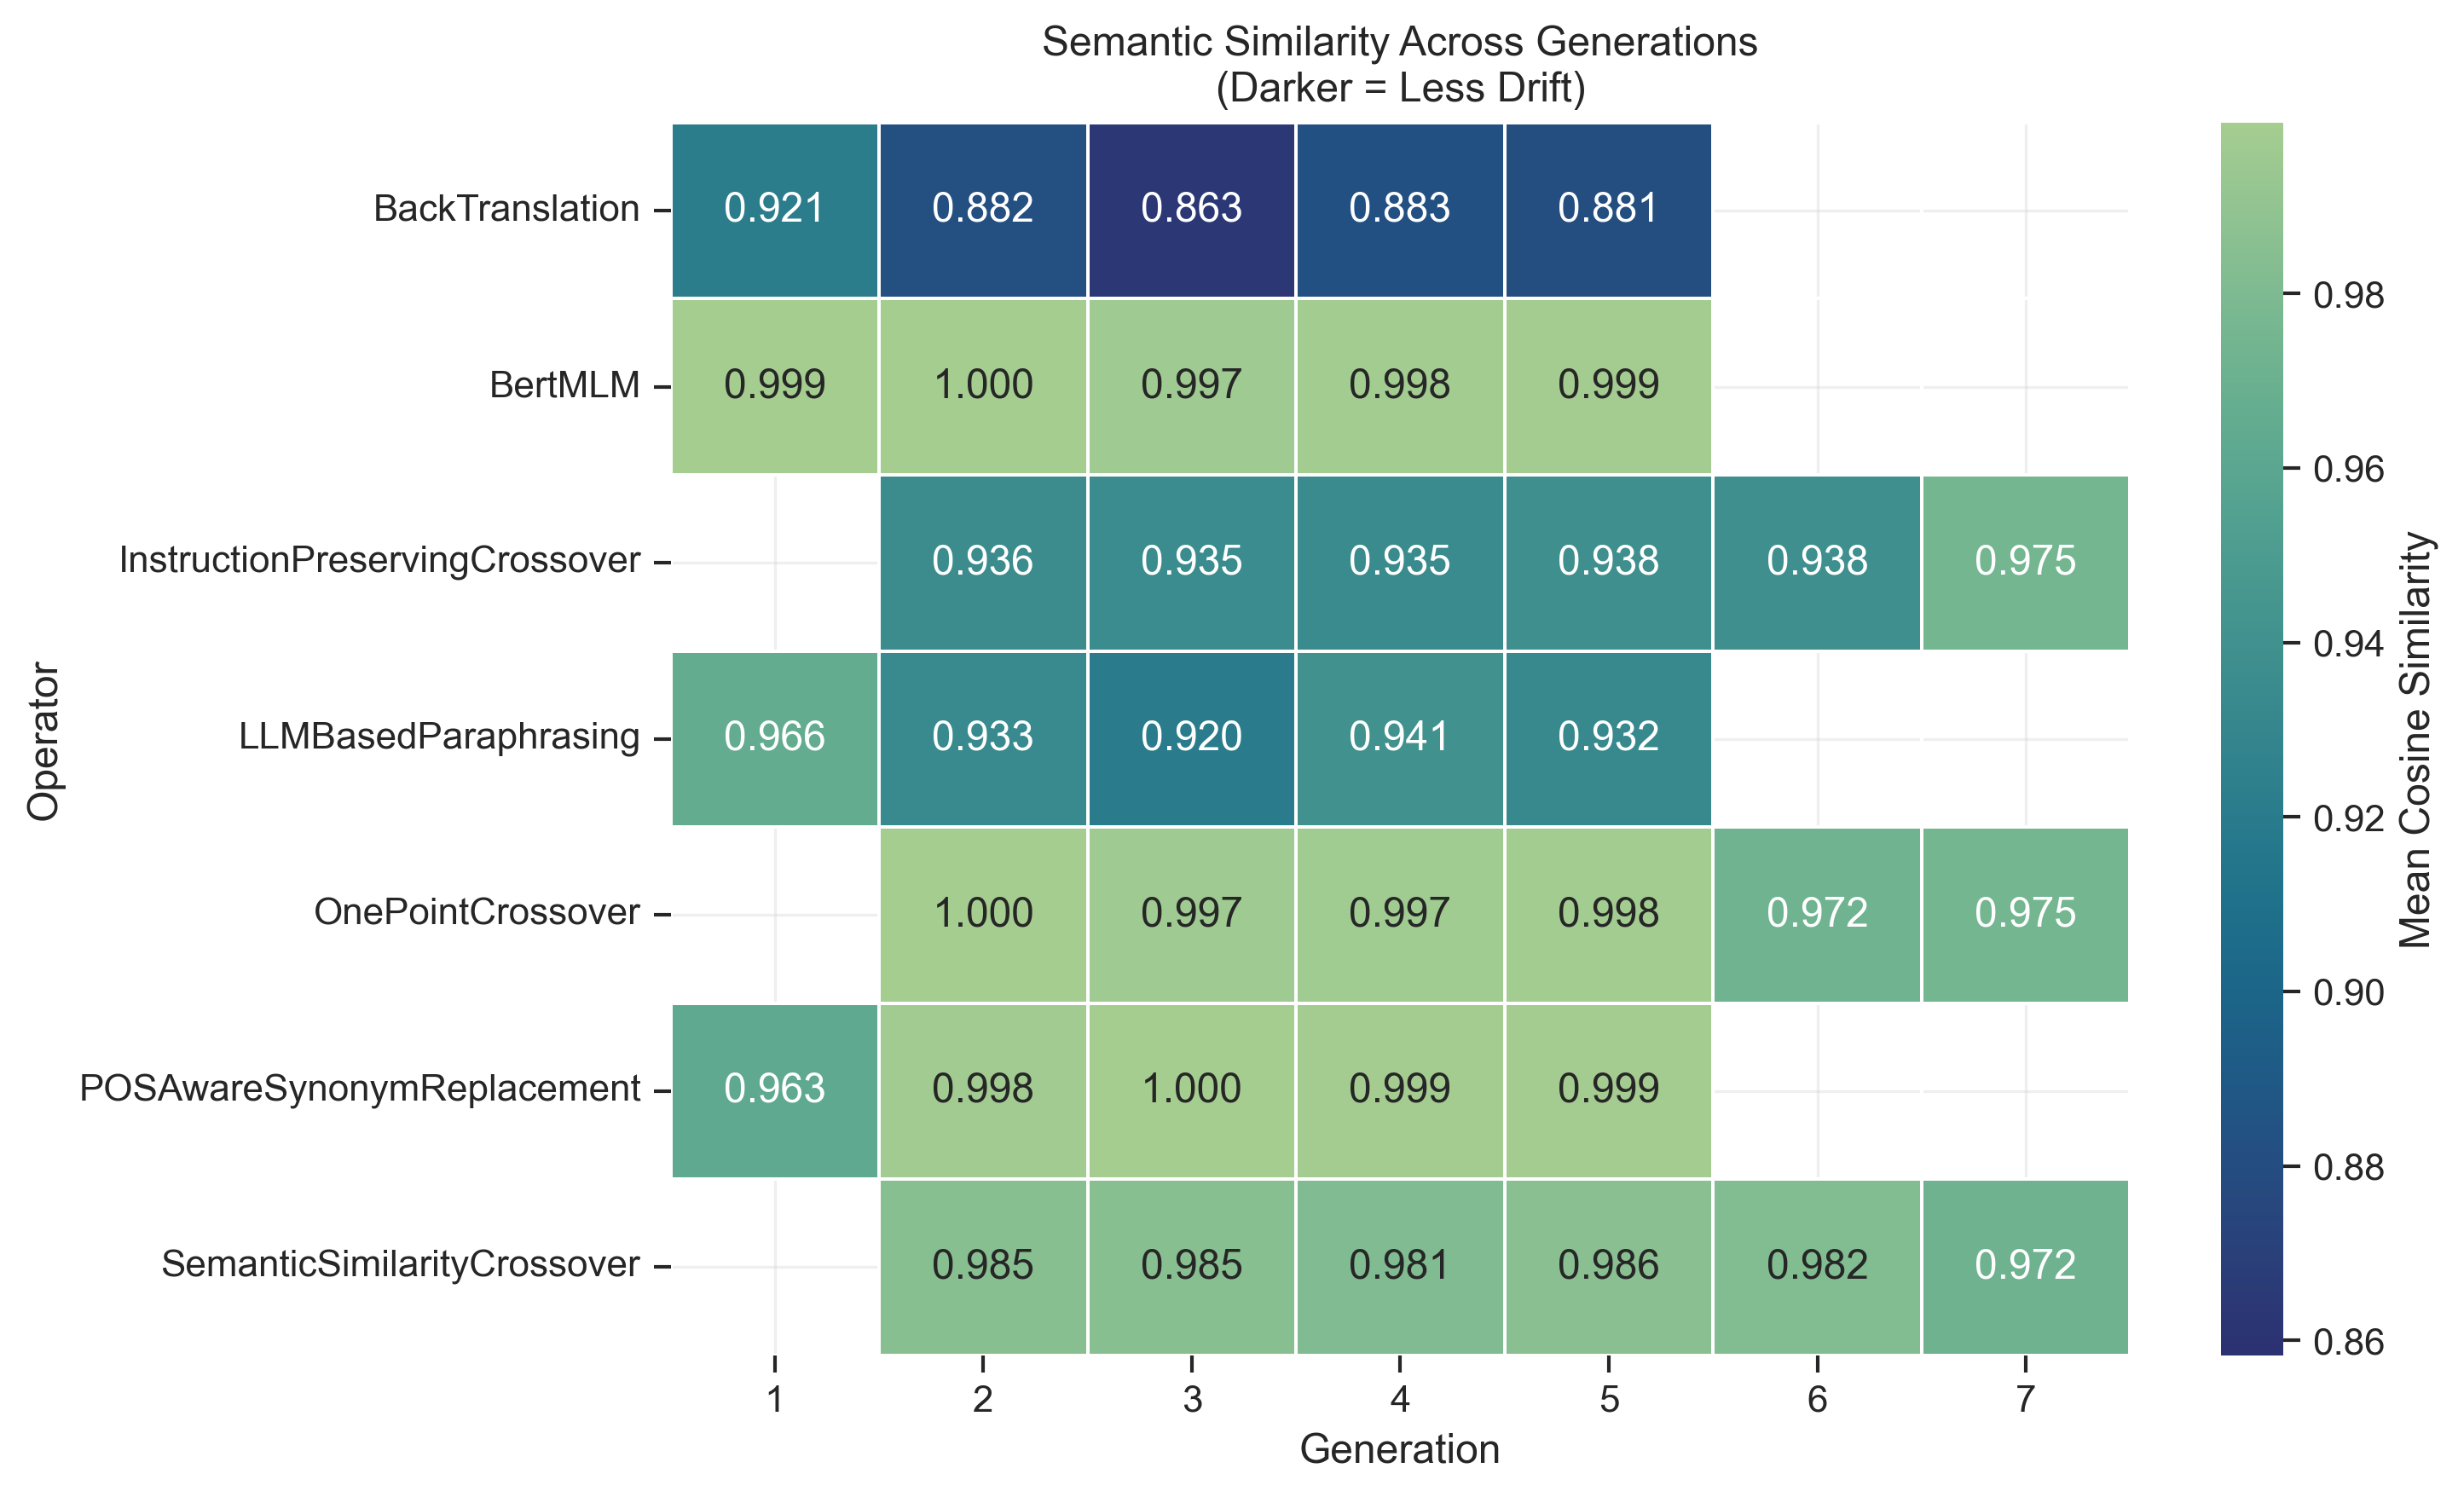

📊 Creating similarity distribution plot...


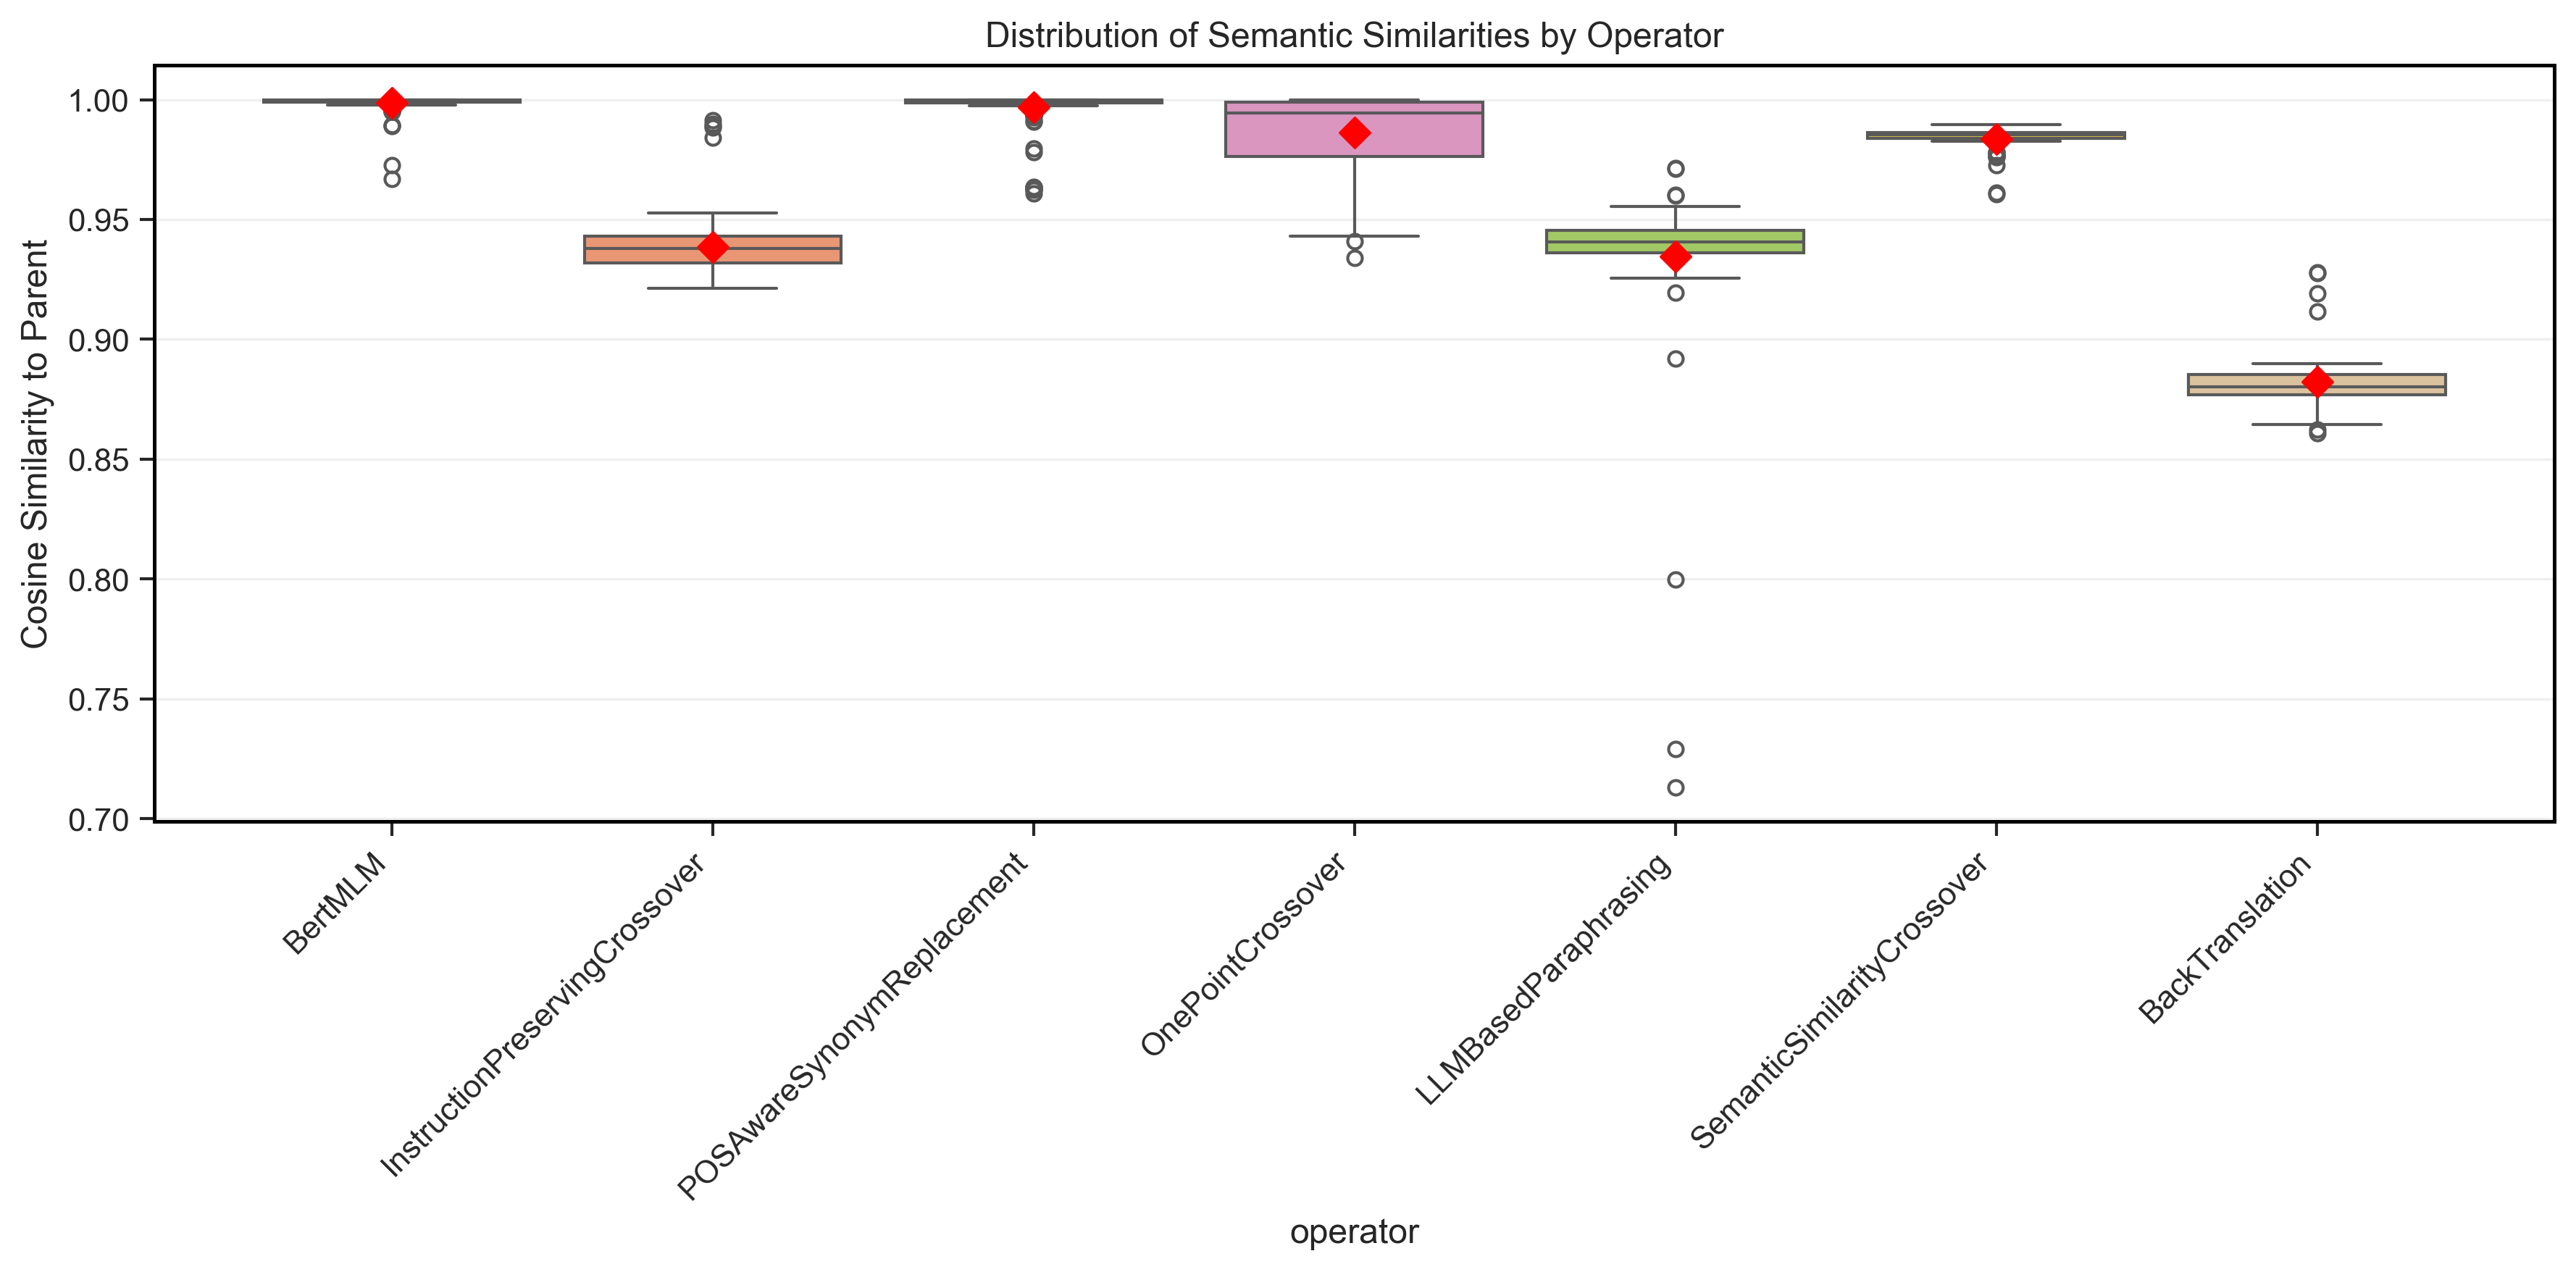

\n🧠 SEMANTIC DRIFT INSIGHTS:
🔍 Operators ranked by semantic drift (most drift first):
  1. BackTranslation: 0.8825 (MEDIUM drift)
  2. LLMBasedParaphrasing: 0.9346 (LOW drift)
  3. InstructionPreservingCrossover: 0.9385 (LOW drift)
  4. SemanticSimilarityCrossover: 0.9835 (LOW drift)
  5. OnePointCrossover: 0.9863 (LOW drift)
  6. POSAwareSynonymReplacement: 0.9968 (LOW drift)
  7. BertMLM: 0.9987 (LOW drift)
\n📈 Overall semantic similarity: 0.9662
📈 Cross-generation trend: increasing similarity
✅ Semantic similarity visualizations complete!


In [52]:
# Semantic Drift Visualization Suite
if run_semantic_analysis and 'sim_to_parent_llama' in dedup_df.columns and len(sim_df) > 0:
    print("📊 Creating semantic drift visualizations...")
    
    try:
        # 1. Bar chart of mean similarity per operator
        print("📊 Creating semantic drift bar chart...")
        
        mean_per_op = (
            sim_df.groupby("operator")["sim_to_parent_llama"]
            .mean()
            .sort_values()  # Ascending: lowest drift (farthest from parent) at top
        )
        
        plt.figure(figsize=(10, 6))
        bars = plt.barh(range(len(mean_per_op)), mean_per_op.values, color='steelblue')
        plt.yticks(range(len(mean_per_op)), mean_per_op.index)
        plt.xlabel("Mean Cosine Similarity to Parent")
        plt.title("Semantic Drift per Operator\n(Lower values = More semantic drift)")
        plt.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(mean_per_op.values):
            plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(OUTPUT_DIR / "semantic_drift_by_operator.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # 2. Heatmap: operator × generation similarity
        print("📊 Creating similarity heatmap...")
        
        if len(pivot_mean.columns) > 1:  # Only if we have multiple generations
            # Compute dynamic limits for better contrast
            vmin = pivot_mean.min().min() - 0.005
            vmax = pivot_mean.max().max()
            
            plt.figure(figsize=(10, 6))
            sns.heatmap(
                pivot_mean,
                annot=True,
                fmt=".3f",
                cmap="crest_r",  # Higher values (less drift) are darker
                vmin=vmin,
                vmax=vmax,
                linewidths=0.5,
                cbar_kws={"label": "Mean Cosine Similarity"}
            )
            plt.title("Semantic Similarity Across Generations\n(Darker = Less Drift)")
            plt.xlabel("Generation")
            plt.ylabel("Operator")
            plt.tight_layout()
            plt.savefig(OUTPUT_DIR / "semantic_similarity_heatmap.png", dpi=300, bbox_inches='tight')
            plt.show()
        else:
            print("⚠️  Skipping heatmap - insufficient generation data")
        
        # 3. Box plot of similarity distributions
        print("📊 Creating similarity distribution plot...")
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=sim_df,
            x="operator",
            y="sim_to_parent_llama",
            palette="Set2"
        )
        plt.xticks(rotation=45, ha='right')
        plt.ylabel("Cosine Similarity to Parent")
        plt.title("Distribution of Semantic Similarities by Operator")
        plt.grid(axis='y', alpha=0.3)
        
        # Add mean markers
        for i, op in enumerate(sim_df['operator'].unique()):
            if pd.notna(op):
                op_data = sim_df[sim_df['operator'] == op]['sim_to_parent_llama']
                mean_val = op_data.mean()
                plt.scatter(i, mean_val, color='red', s=50, marker='D', zorder=5)
        
        plt.tight_layout()
        plt.savefig(OUTPUT_DIR / "semantic_similarity_distributions.png", dpi=300, bbox_inches='tight')
        plt.show()
        
        # 4. Summary insights
        print("\\n🧠 SEMANTIC DRIFT INSIGHTS:")
        print("="*50)
        
        # Rank operators by semantic drift (lower similarity = more drift)
        ranked_ops = mean_per_op.sort_values()
        print(f"🔍 Operators ranked by semantic drift (most drift first):")
        for i, (op, sim) in enumerate(ranked_ops.items(), 1):
            drift_level = "HIGH" if sim < 0.85 else "MEDIUM" if sim < 0.92 else "LOW"
            print(f"  {i}. {op}: {sim:.4f} ({drift_level} drift)")
        
        # Overall statistics
        global_mean = sim_df["sim_to_parent_llama"].mean()
        print(f"\\n📈 Overall semantic similarity: {global_mean:.4f}")
        
        # Identify interesting patterns
        if len(pivot_mean.columns) > 1:
            # Check if similarity changes across generations
            gen_means = pivot_mean.mean(axis=0)  # Mean across operators for each generation
            if len(gen_means) > 1:
                trend = "increasing" if gen_means.iloc[-1] > gen_means.iloc[0] else "decreasing"
                print(f"📈 Cross-generation trend: {trend} similarity")
        
        print("✅ Semantic similarity visualizations complete!")
        
    except Exception as e:
        print(f"❌ Failed to create visualizations: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("⏭️  Skipping semantic visualizations (no valid data)")


# Publication-Ready Exports


In [53]:
# Generate LaTeX Tables and Publication Materials
if run_semantic_analysis and 'master_table' in locals() and len(master_table) > 0:
    print("📑 Generating publication-ready materials...")
    
    try:
        # 1. LaTeX table for semantic similarity results
        print("📝 Creating LaTeX table...")
        
        # Filter to operator totals only (exclude per-generation and global)
        latex_data = (
            master_table.query("generation == 'ALL' and operator != 'ALL'")
            .drop(columns=["generation"])
            .set_index("operator")
            .round(3)
        )
        
        if len(latex_data) > 0:
            # Generate LaTeX table
            latex_table = latex_data.to_latex(
                column_format="l" + "r" * len(latex_data.columns),
                bold_rows=True,
                float_format="%.3f",
                caption="Semantic similarity statistics by operator",
                label="tab:semantic_similarity"
            )
            
            # Save LaTeX table
            latex_file = OUTPUT_DIR / "semantic_similarity_table.tex"
            with open(latex_file, "w") as f:
                f.write(latex_table)
            
            print(f"✅ LaTeX table saved to {latex_file}")
            
            # Also display the table for preview
            print("\\n📋 LaTeX Table Preview:")
            display(latex_data)
        
        # 2. Summary statistics for papers
        print("📊 Generating summary statistics...")
        
        if 'sim_df' in locals() and len(sim_df) > 0:
            summary_stats = {
                "total_comparisons": len(sim_df),
                "mean_similarity": sim_df["sim_to_parent_llama"].mean(),
                "std_similarity": sim_df["sim_to_parent_llama"].std(),
                "min_similarity": sim_df["sim_to_parent_llama"].min(),
                "max_similarity": sim_df["sim_to_parent_llama"].max(),
                "operators_analyzed": sim_df["operator"].nunique(),
                "generations_analyzed": sim_df["generation"].nunique()
            }
            
            # Save summary for papers
            summary_file = OUTPUT_DIR / "semantic_analysis_summary.json"
            with open(summary_file, "w") as f:
                json.dump({k: float(v) if pd.api.types.is_numeric_dtype(type(v)) else v 
                          for k, v in summary_stats.items()}, f, indent=2)
            
            print(f"✅ Summary statistics saved to {summary_file}")
            
            # Display key findings
            print("\\n🎯 KEY FINDINGS FOR PUBLICATION:")
            print("="*50)
            print(f"• Analyzed {summary_stats['total_comparisons']:,} parent-child similarity comparisons")
            print(f"• Overall mean similarity: {summary_stats['mean_similarity']:.4f} ± {summary_stats['std_similarity']:.4f}")
            print(f"• Similarity range: {summary_stats['min_similarity']:.4f} – {summary_stats['max_similarity']:.4f}")
            print(f"• Evaluated {summary_stats['operators_analyzed']} operators across {summary_stats['generations_analyzed']} generations")
            
            # Rank operators for publication
            if 'mean_per_op' in locals():
                print(f"\\n📊 OPERATOR PERFORMANCE RANKING:")
                for i, (op, sim) in enumerate(mean_per_op.sort_values().items(), 1):
                    print(f"  {i}. {op}: {sim:.4f}")
        
        # 3. Research insights
        print("\\n🔬 RESEARCH INSIGHTS:")
        print("="*50)
        
        if 'mean_per_op' in locals() and len(mean_per_op) > 1:
            best_preserving = mean_per_op.idxmax()
            most_creative = mean_per_op.idxmin()
            similarity_range = mean_per_op.max() - mean_per_op.min()
            
            print(f"• Most semantically preserving operator: {best_preserving} ({mean_per_op.max():.4f})")
            print(f"• Most semantically creative operator: {most_creative} ({mean_per_op.min():.4f})")
            print(f"• Semantic diversity range: {similarity_range:.4f}")
            
            if similarity_range > 0.05:
                print("• Significant semantic diversity between operators detected")
            else:
                print("• Operators show similar semantic behavior")
        
        print("\\n✅ Publication materials generated!")
        
    except Exception as e:
        print(f"❌ Failed to generate publication materials: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("⏭️  Skipping publication materials (no semantic analysis data)")


📑 Generating publication-ready materials...
📝 Creating LaTeX table...
✅ LaTeX table saved to ../experiments/semantic_similarity_table.tex
\n📋 LaTeX Table Preview:


count   mean  median    std  q25  q75    min  \
operator                                                                       
BackTranslation                  63.0  0.882   0.880  0.012  NaN  NaN  0.861   
BertMLM                         166.0  0.999   1.000  0.004  NaN  NaN  0.967   
InstructionPreservingCrossover  210.0  0.938   0.938  0.010  NaN  NaN  0.921   
LLMBasedParaphrasing             88.0  0.935   0.941  0.037  NaN  NaN  0.713   
OnePointCrossover                99.0  0.986   0.994  0.016  NaN  NaN  0.934   
POSAwareSynonymReplacement      177.0  0.997   1.000  0.009  NaN  NaN  0.961   
SemanticSimilarityCrossover      62.0  0.984   0.985  0.005  NaN  NaN  0.960   

                                  max  pct_lt_0_8  
operator                                           
BackTranslation                 0.928         NaN  
BertMLM                         1.000         NaN  
InstructionPreservingCrossover  0.992         NaN  
LLMBasedParaphrasing            0.971         NaN  
OnePointCrossover               1.000         NaN  
POSAwareSynonymReplacement      1.000         NaN  
SemanticSimilarityCrossover     0.990         NaN

📊 Generating summary statistics...
✅ Summary statistics saved to ../experiments/semantic_analysis_summary.json
\n🎯 KEY FINDINGS FOR PUBLICATION:
• Analyzed 865 parent-child similarity comparisons
• Overall mean similarity: 0.9662 ± 0.0386
• Similarity range: 0.7131 – 1.0000
• Evaluated 7 operators across 7 generations
\n📊 OPERATOR PERFORMANCE RANKING:
  1. BackTranslation: 0.8825
  2. LLMBasedParaphrasing: 0.9346
  3. InstructionPreservingCrossover: 0.9385
  4. SemanticSimilarityCrossover: 0.9835
  5. OnePointCrossover: 0.9863
  6. POSAwareSynonymReplacement: 0.9968
  7. BertMLM: 0.9987
\n🔬 RESEARCH INSIGHTS:
• Most semantically preserving operator: BertMLM (0.9987)
• Most semantically creative operator: BackTranslation (0.8825)
• Semantic diversity range: 0.1163
• Significant semantic diversity between operators detected
\n✅ Publication materials generated!


# Semantic Similarity Analysis with LLaMA Embeddings

## 🧠 Advanced Semantic Drift Analysis

This section performs sophisticated semantic similarity analysis using LLaMA embeddings to understand how different operators affect the semantic meaning of generated text compared to their parents.


In [54]:
total_genomes = len(df)
operator_counts = df["operator"].value_counts()
unique_ops     = operator_counts.index.tolist()
n_ops          = operator_counts.size
gen_min, gen_max = df["generation"].min(), df["generation"].max()

# Check multiple status possibilities (complete, pending_evolution, etc.)
pending = df[df["status"] != "complete"]

# Check for missing violence scores (primary toxicity metric)
if "score_violence" in df.columns:
    missing_violence = df["score_violence"].isna()
    violence_col_exists = True
else:
    missing_violence = pd.Series([True] * len(df))  # All missing if column doesn't exist
    violence_col_exists = False

# Check for missing responses (both field names)
missing_response = (df["generated_response"].isna() & df.get("generated_text", pd.Series([True] * len(df))).isna())

duplicate_prompts = df.duplicated("prompt").sum()

# Create comprehensive summary
summary = pd.DataFrame({
    "Metric": [
        "Total genomes",
        "Unique operators", 
        "Operator→count map",
        "Generation range (min,max)",
        "Pending/incomplete genomes",
        f"Rows missing violence scores{'' if violence_col_exists else ' (column missing)'}",
        "Rows missing response",
        "Duplicate prompts"
    ],
    "Value": [
        total_genomes,
        n_ops,
        operator_counts.to_dict(),
        (int(gen_min), int(gen_max)),
        len(pending),
        missing_violence.sum(),
        missing_response.sum(),
        duplicate_prompts
    ]
})

print("=== Updated Dataset Summary ===")
display(summary)

=== Updated Dataset Summary ===


Metric  \
0                 Total genomes   
1              Unique operators   
2            Operator→count map   
3    Generation range (min,max)   
4    Pending/incomplete genomes   
5  Rows missing violence scores   
6         Rows missing response   
7             Duplicate prompts   

                                               Value  
0                                                866  
1                                                  7  
2  {'InstructionPreservingCrossover': 210, 'POSAw...  
3                                             (0, 7)  
4                                                866  
5                                                 57  
6                                                 17  
7                                                  0